# Business Problem

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.

# Penjelasan mengenai variabel ada disini


- Customer ID = Id tiap customer
- Churn = Label customer churn atau tidak (1 Churn dan 0 tidak Churn)
- Tenure = lama pelanggan diukur dari pembelian pertama
- PreferredLoginDevice = perangkat yang digunakan pelanggan untuk login
- CityTier = Tingkat kota
- WarehouseToHome = jarak gudang ke rumah (estimasi dalam bentuk km)
- PreferredPaymentMode = metode pembayaran
- Gender = jenis kelamin
- HourSpendOnApp = jumlah jam yang dihabiskan pada aplikasi(kemungkinan diambil rata" tiap hari)
- PreferedOrderCat = kategori pesanan bulan lalu
- SatisfactionScore = tingak kepuasan pelanggan (mungkin diambil dalam bentuk review bintang)
- MaritalStatus = status pernikahan customer
- NumberOfAddress = total alamat yang ditambahkan pada tiap customer
- Complain = apakah ada keluhan pada customer tersebut bulan lalu
- OrderAmountHikeFromlastYear = peningkatan presentase pembelian dari tahun lalu
- CouponUsed = total kupon yang digunakan pada bulan lalu
- OrderCount = jumlah pesanan yang dilakukan pada bulan kemarin
- DaySinceLastOrder = terakhir customer melakukan order
- CashbackAmount = rata' cashabck yang didapat pada bulan lalu

# Import Library

In [99]:
# Pandas
import pandas as pd
pd.set_option("display.max_columns",None)

# Numpy
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import ttest_ind
from scipy.stats import kstest, shapiro
from scipy.stats import f_oneway

#Sklearn
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#balancing
from imblearn.over_sampling import ADASYN

#collection
from collections import Counter

#Modeling
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as ltb

# Evaluation
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             roc_curve)
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC
import dalex as dx

#Deployment
import pickle

# Ignoring warning
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
ecom = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

# Data Inspection

In [3]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
ecom.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Isi dari kolom dan tipe data kolom sudah sesuai 

In [6]:
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Dari inspeksi data didapat terdapat kolom yang missing dan penganganan missing value sebagai berikut
- Tenure = karena lama pelanggan diukur dari pembelian pertama, maka ada kemungkinan nilai nan ini  adalah pelanggan baru saja melakukan pembelian sehingga handling missing value jadi 0
- Warehousetohome = karena tidak mungkin jika jaraknya 0 maka ambil tergantung dari skew pada variabel warehouse to home
- Hourspendonapp = karena memungkinkan untuk jam saat customer mengunjungi aplikasi hanya saat membutuhkan barang sehingga kurang dari 1 jam (handling missing value jadi 0)
- OrderAmountHikeFromlastYear = ambil dari skew variabel
- Coupon used = karena mungkin tidak ada kupon yang digunakan maka missing value handle dengan 0
- Order count = tidak mungkin tidak melakukan order sedangkan datanya masuk ke dataset sehingga isi dengan skew pada variabel
- daysincelastorder = kemungknan order adalah berjarak dekat dengan pengambilan data sehingga missing value bisa diisi dengan 0


##### Rule of thumb jika presentase missing value pada suatu variabel daiats 30% maka varaibel tersebut diremove dari dataset

In [7]:
ecom.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [8]:
ecom.shape

(5630, 20)

In [9]:
for col in ecom:
    if ecom[col].isnull().sum()/len(ecom[col])>0.3:
        print("drop column",col)
        
    else:
        print('Dont drop column',col)

Dont drop column CustomerID
Dont drop column Churn
Dont drop column Tenure
Dont drop column PreferredLoginDevice
Dont drop column CityTier
Dont drop column WarehouseToHome
Dont drop column PreferredPaymentMode
Dont drop column Gender
Dont drop column HourSpendOnApp
Dont drop column NumberOfDeviceRegistered
Dont drop column PreferedOrderCat
Dont drop column SatisfactionScore
Dont drop column MaritalStatus
Dont drop column NumberOfAddress
Dont drop column Complain
Dont drop column OrderAmountHikeFromlastYear
Dont drop column CouponUsed
Dont drop column OrderCount
Dont drop column DaySinceLastOrder
Dont drop column CashbackAmount


Tidak ada data yang missing value melebihi 30%

# Handling missing value

In [10]:
# handling missing value dengan nilai 0
ecom_fillna0 = [
    'Tenure',
    'HourSpendOnApp',
    'CouponUsed',
    'DaySinceLastOrder'
]

In [11]:
for col in ecom_fillna0:
    ecom[col] = ecom[col].fillna(0)

In [12]:
# handling missing value using skew
ecom_fillnaskew = [
    'WarehouseToHome',
    'OrderAmountHikeFromlastYear',
    'OrderCount'
]

In [13]:
for col in ecom_fillnaskew:
    skewvalue = ecom[col].skew(axis=0, skipna=True)
    if skewvalue <=0.5 and skewvalue >= -0.5:
        ecom[col].fillna(value=ecom[col].mean(), inplace=True)
    else:
        ecom[col].fillna(value=ecom[col].median(), inplace=True)

In [14]:
ecom.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [15]:
ecom.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,9.712078,1.654707,15.566785,2.798757,3.688988,3.066785,4.214032,0.284902,15.674600,1.671403,2.961812,4.295737,177.223030
std,1625.385339,0.374240,8.627486,0.915389,8.345961,0.932334,1.023999,1.380194,2.583586,0.451408,3.591058,1.886648,2.879248,3.700134,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,145.770000
50%,52815.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Handling outlier

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

Despite all this, as much as you’d like to, it is NOT acceptable to drop an observation just because it is an outlier.  They can be legitimate observations and are sometimes the most interesting ones.  It’s important to investigate the nature of the outlier before deciding.

jadi harus dianalisa terlebih dahulu mengenai variabel yang outlier, tidak bisa memutuskan secara pihakh harus drop row tersebut karena outlier

In [16]:
def diagnostic_plots(df, variabel):
    
    # figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variabel], bins=30)
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variabel], dist='norm', plot=plt)
    plt.ylabel('RM quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    
    plt.show()

In [17]:
num = ecom.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

Plot for numerikal (checking outlier)

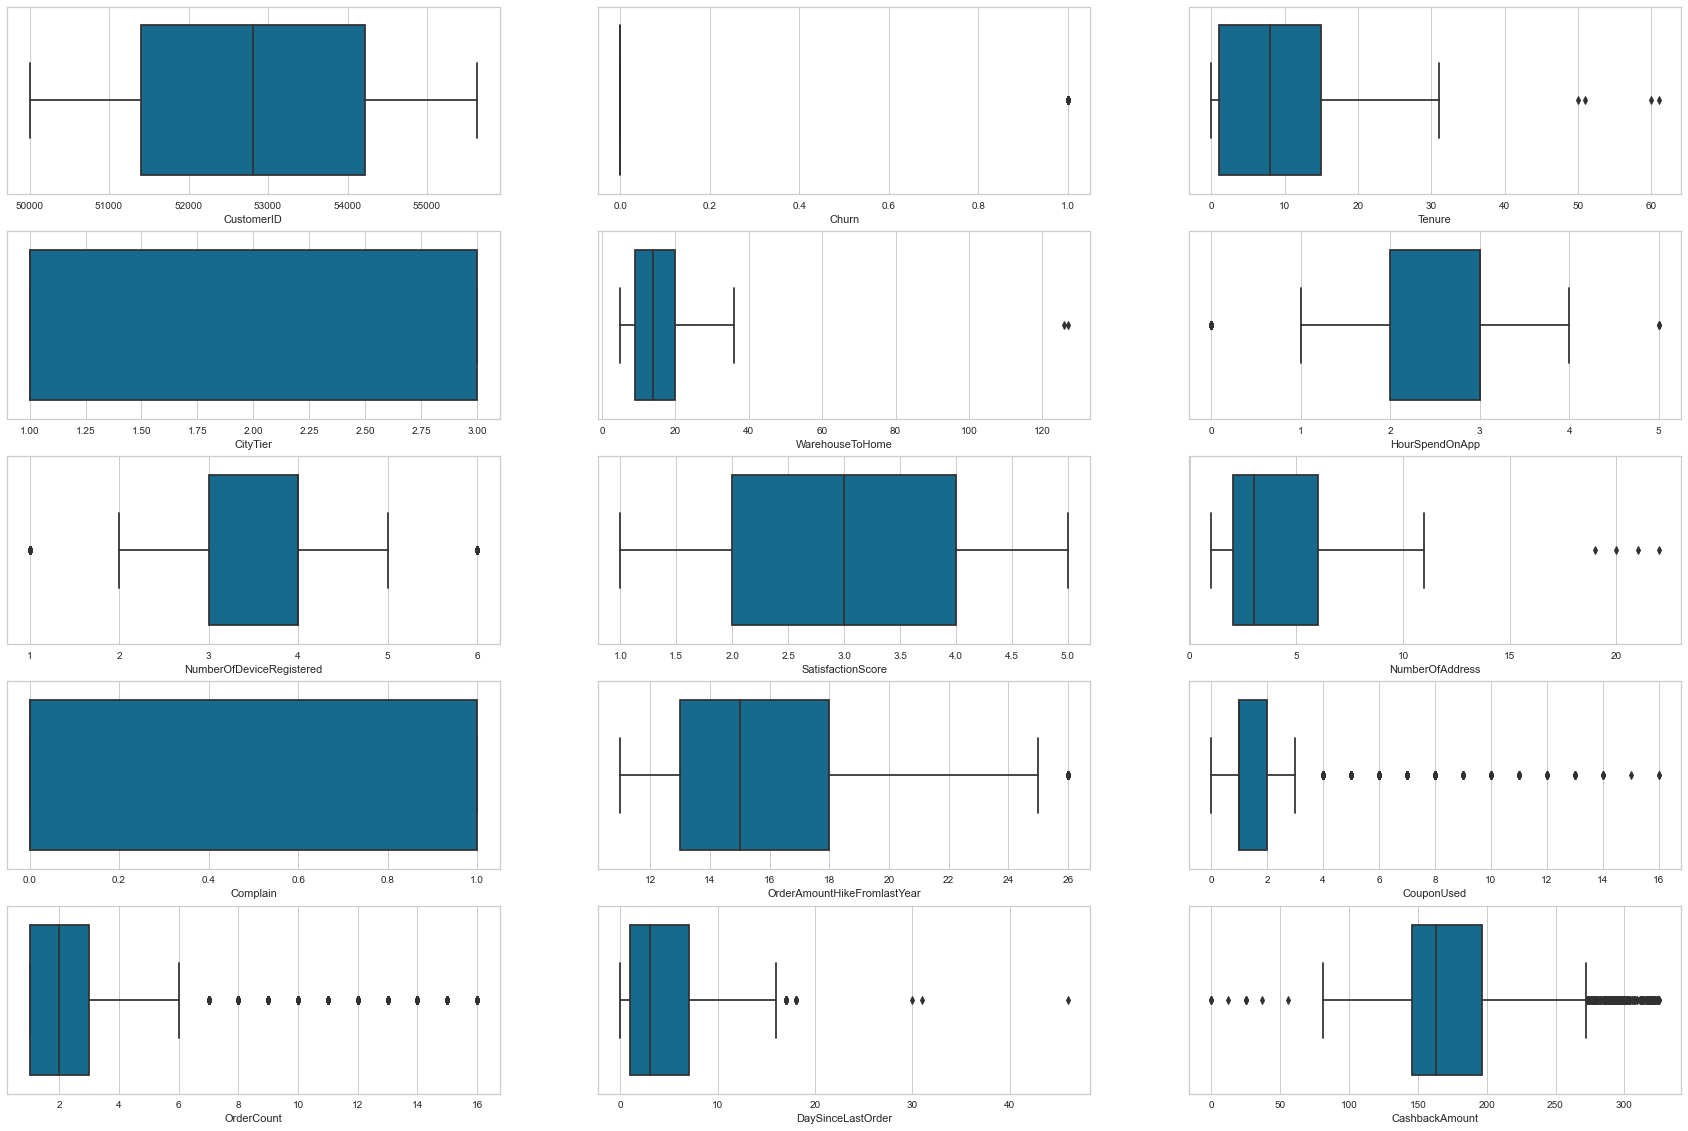

In [18]:
plt.figure(figsize=(30,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

dari boxplot dan analisa lebih lanjut mengenai variabel tersebut maka berikut variabel yang memiliki nilai outlier tetapi perlu dibuang dan tidak perlu dibuang
- Churn = karena label dan hanya binary tidak perlu dibuang
- Tenure = terdapat outlier pada angka 50 keatas, ada 2 kemungkinan, yang pertama memang tenure yang sangat tinggi (pelanggan lama sekali), yang kedua kemungkinan salah input. dan kali ini saya akan menganggap itu adalah salah input seharusnya nilai tidak sebesar itu sehingga baris tersebut akan saya hapus
- warehouse to home = sama dengan tenure kemungkinan ada customer yang rumahnya sangat jauh, atau salah memasukkan data. saya lebih memilih untuk removing baris yang outlier pada variabel ini
- hourspend on app = saya memutuskan untuk tidak remove baris outlier pada variabel ini karena mungkin saja nilainya 0 karena hanya mengunjungi applikasi dibawah 1 jam
- number of address = saya memutuskan untuk drop outlier pada variabel ini karena tidak masuk akal saja ada yang menambahkan alamat hingga 18 keatas, ada kemungkinan salah input
- order amount hike from lastyear = perlu remove outlier
- coupon used = perlu analisa lanjut
- order count = perlu analisa lanjut
- dayscincelas order
- cashback amount

CustomerID


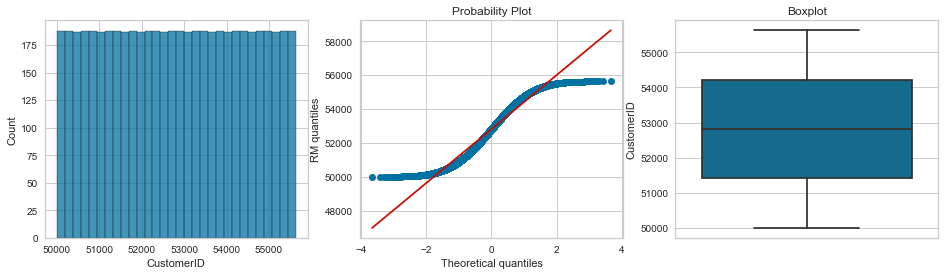

Churn


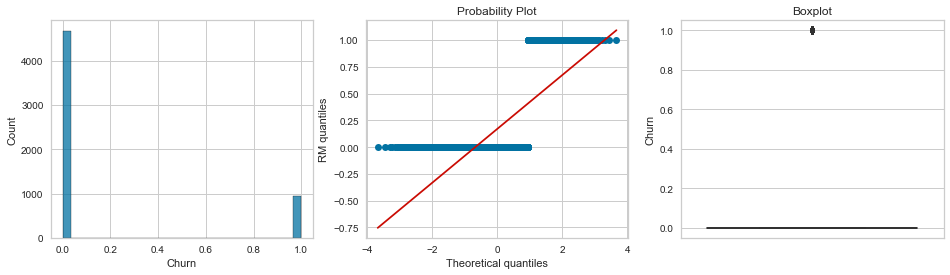

Tenure


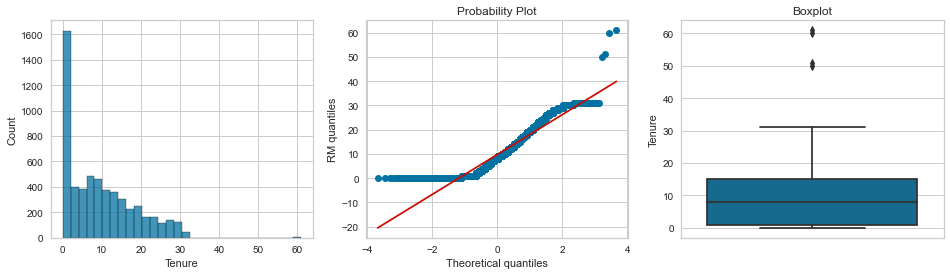

CityTier


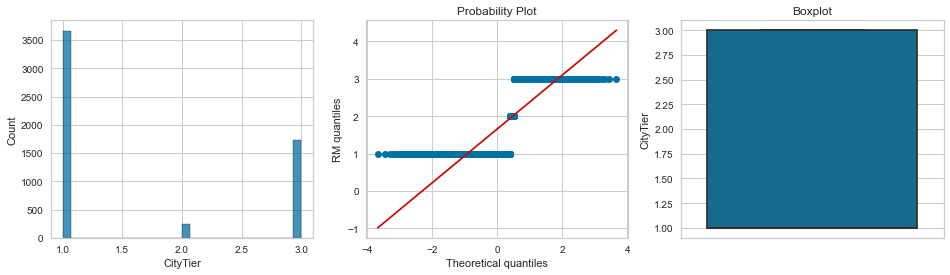

WarehouseToHome


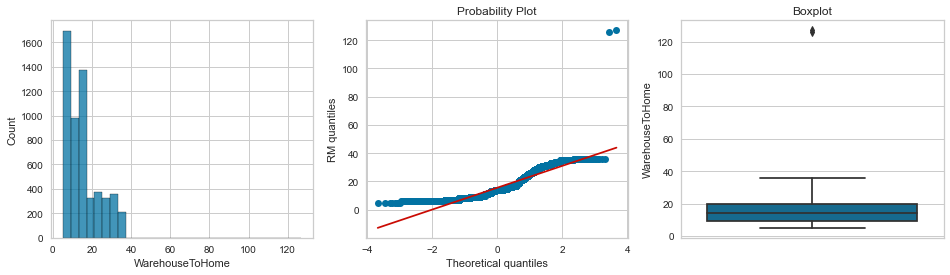

HourSpendOnApp


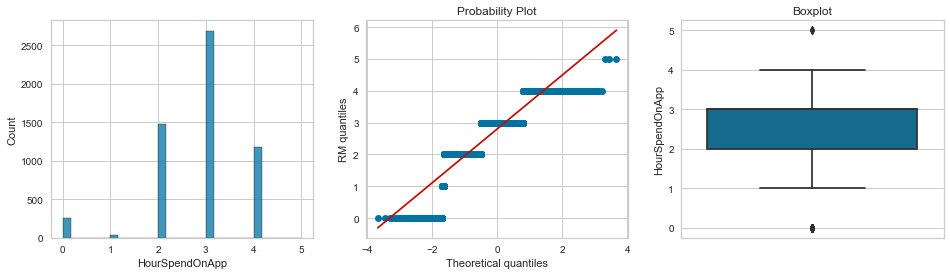

NumberOfDeviceRegistered


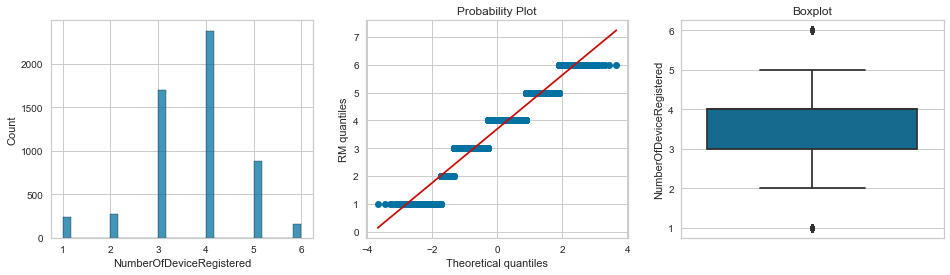

SatisfactionScore


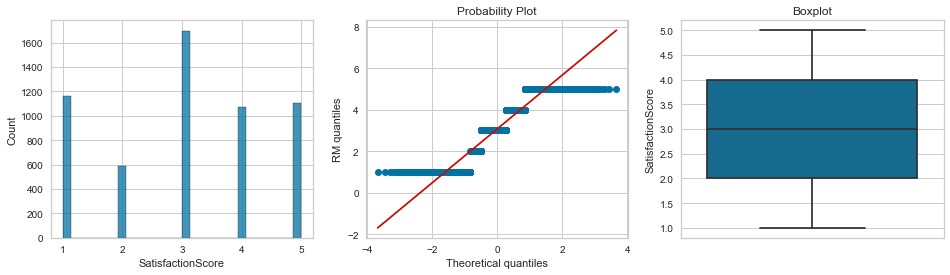

NumberOfAddress


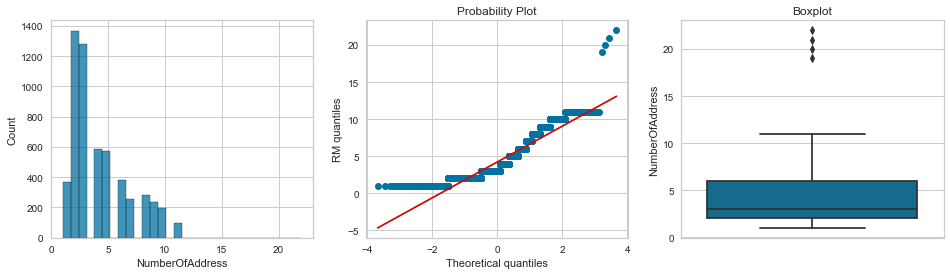

Complain


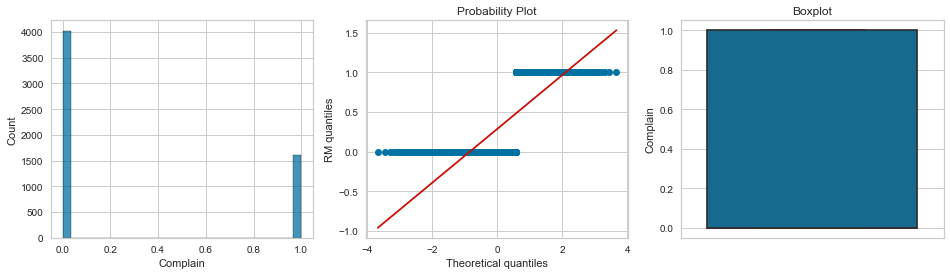

OrderAmountHikeFromlastYear


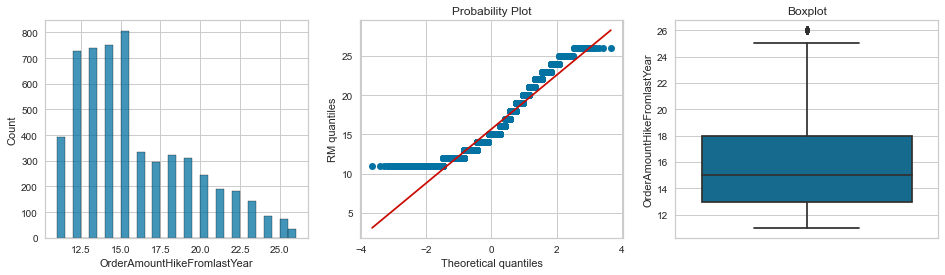

CouponUsed


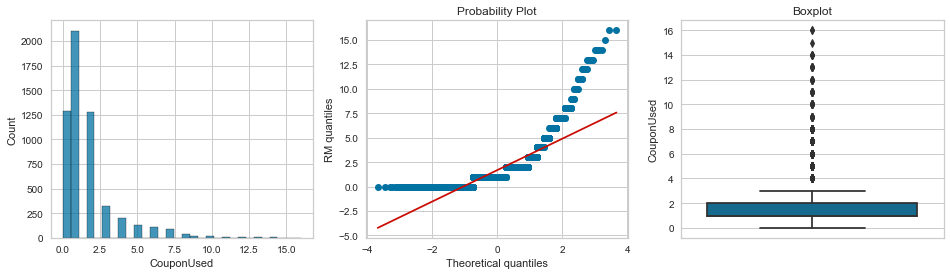

OrderCount


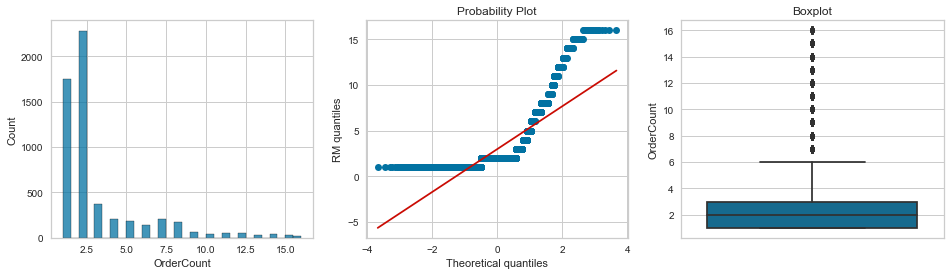

DaySinceLastOrder


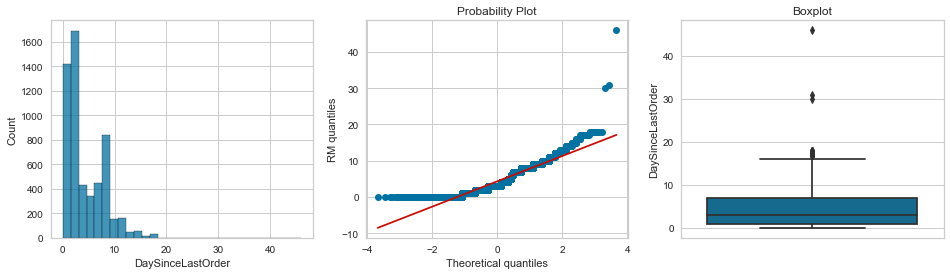

CashbackAmount


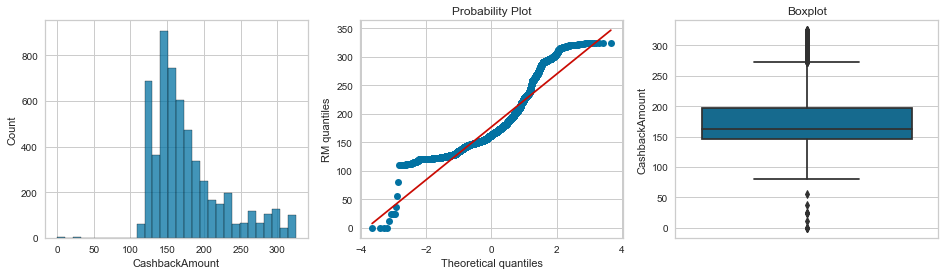

In [19]:
for col in numerikal:
    print(col)
    diagnostic_plots(ecom, col)

In [20]:
ecom.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [21]:
drop_outlier = [
    'Tenure',
    'WarehouseToHome',
    'NumberOfAddress',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

In [22]:
# before handling outlier
ecom.shape

(5630, 20)

In [23]:
for col in drop_outlier:
    mean = ecom[col].mean()
    std = ecom[col].std()
    limit = 3*std
    limit_atas = mean + 3*std
    limit_bawah = mean - 3*std
    ecom.drop(ecom.index[ecom[col]> limit_atas] | ecom.index[ecom[col]<limit_bawah], inplace=True)
    

In [24]:
# after handling outlier
ecom.shape

(5226, 20)

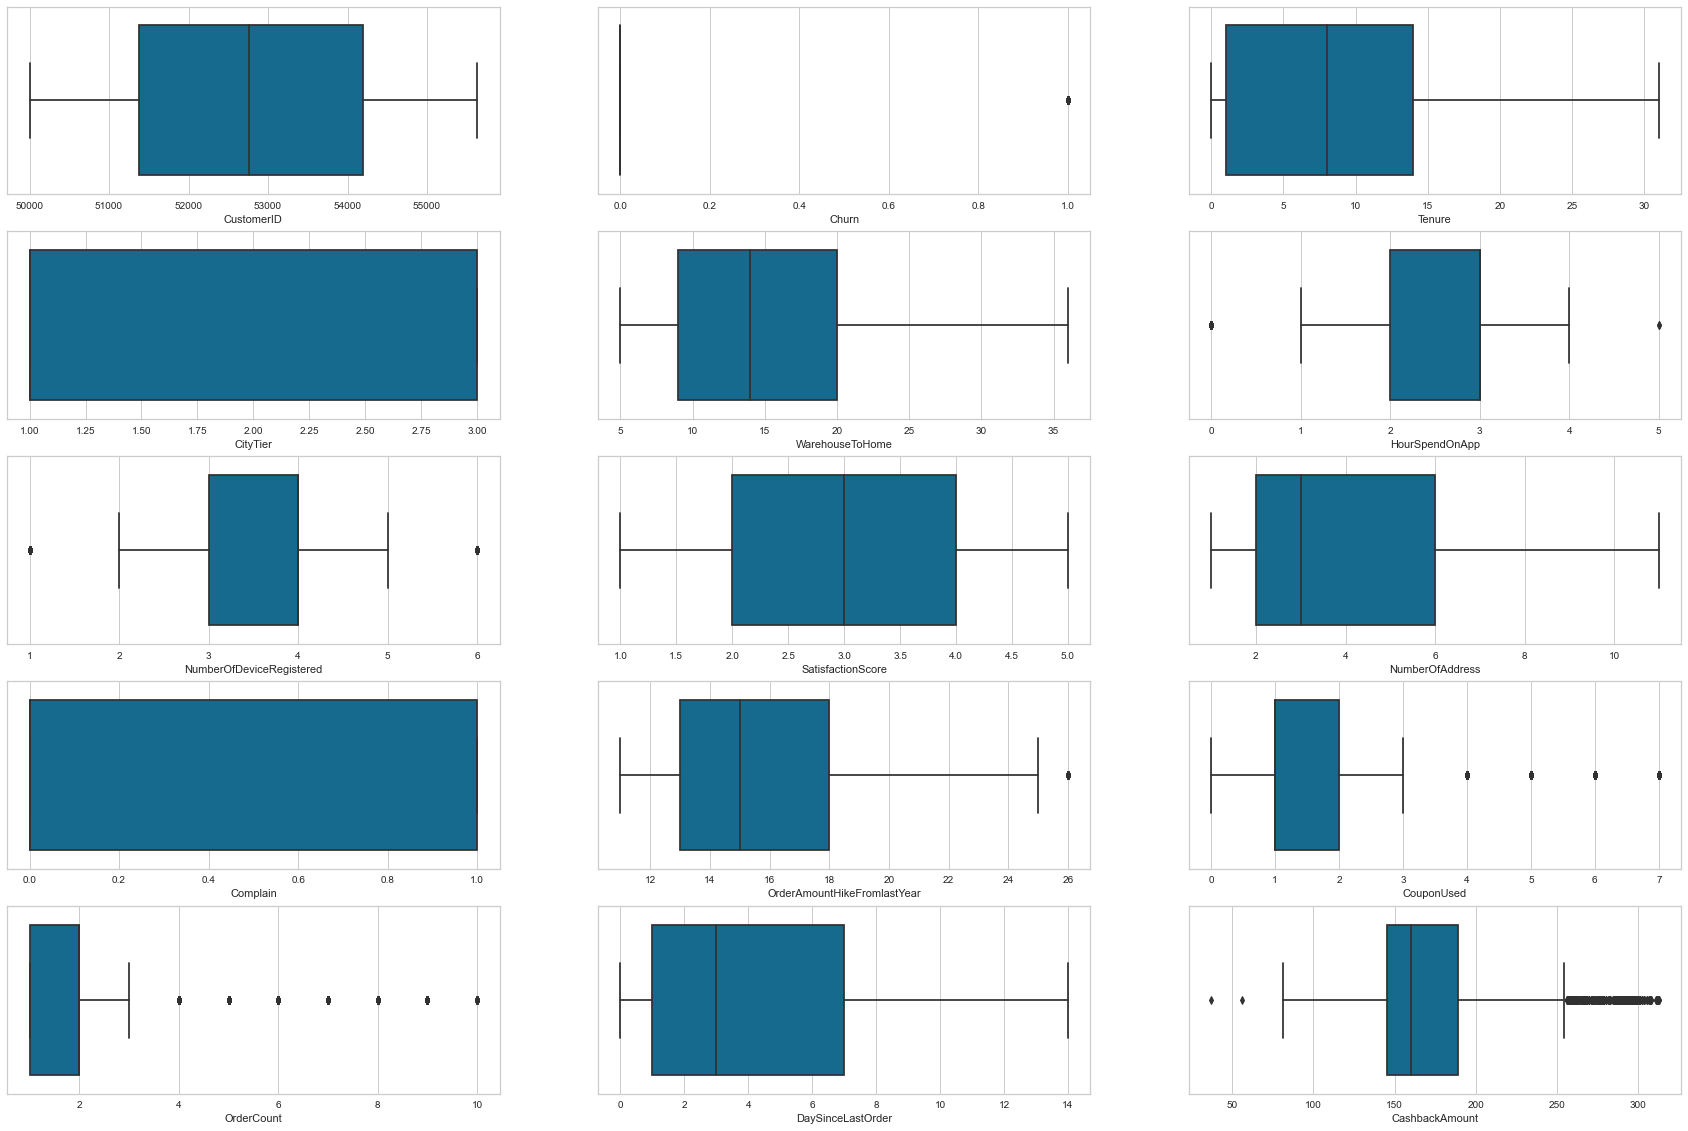

In [25]:
plt.figure(figsize=(30,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

# Feature selection (Numerikal Data)

<AxesSubplot:>

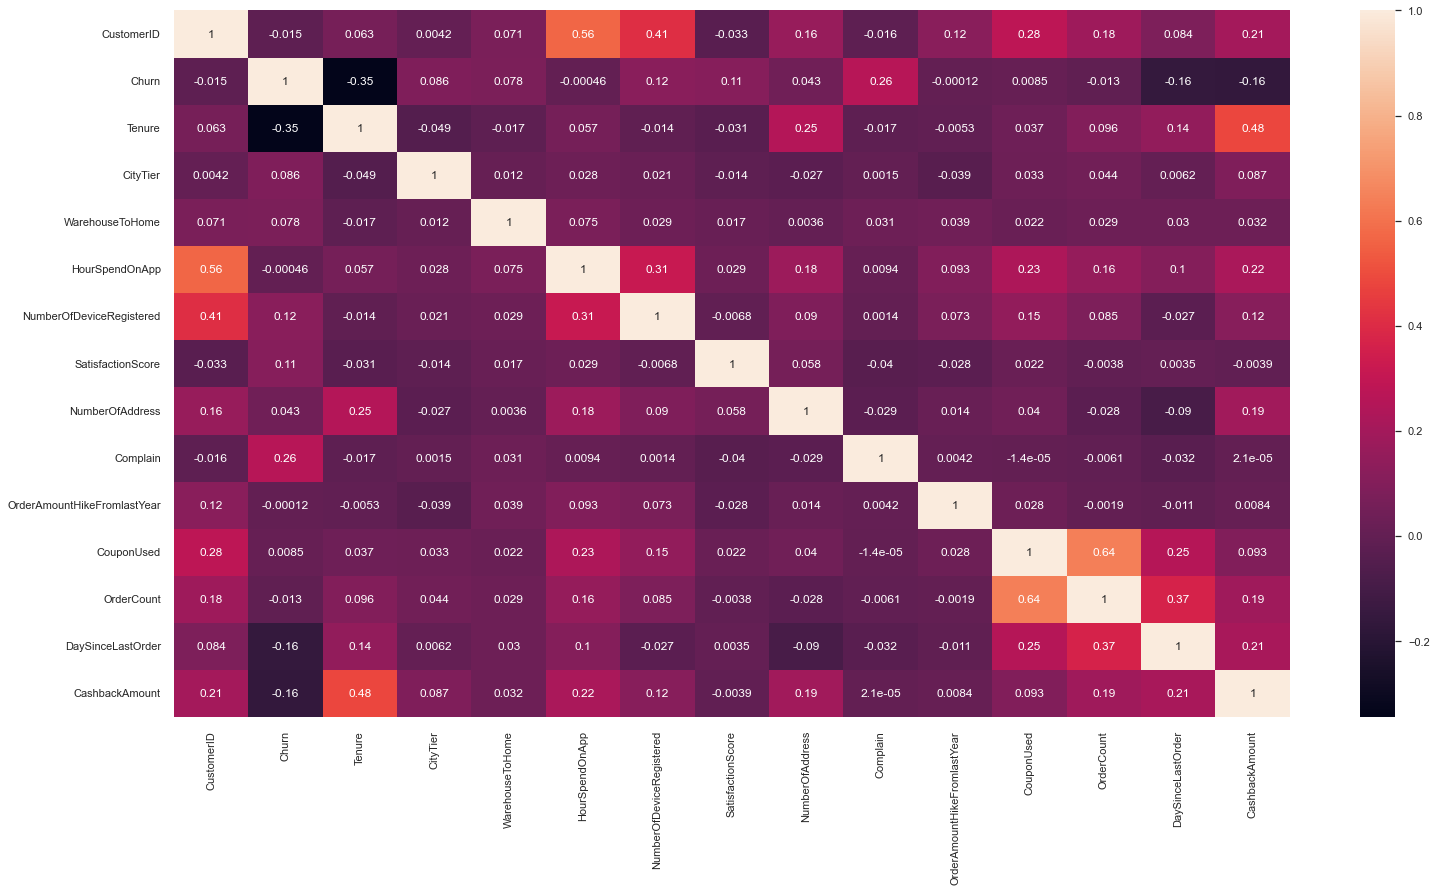

In [26]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom.corr(), annot=True)

Variabel yang memiliki nilai uniq 2 atau 3 akan saya masukkan sebagai kategorikal data pada saat feature selection

### EDA

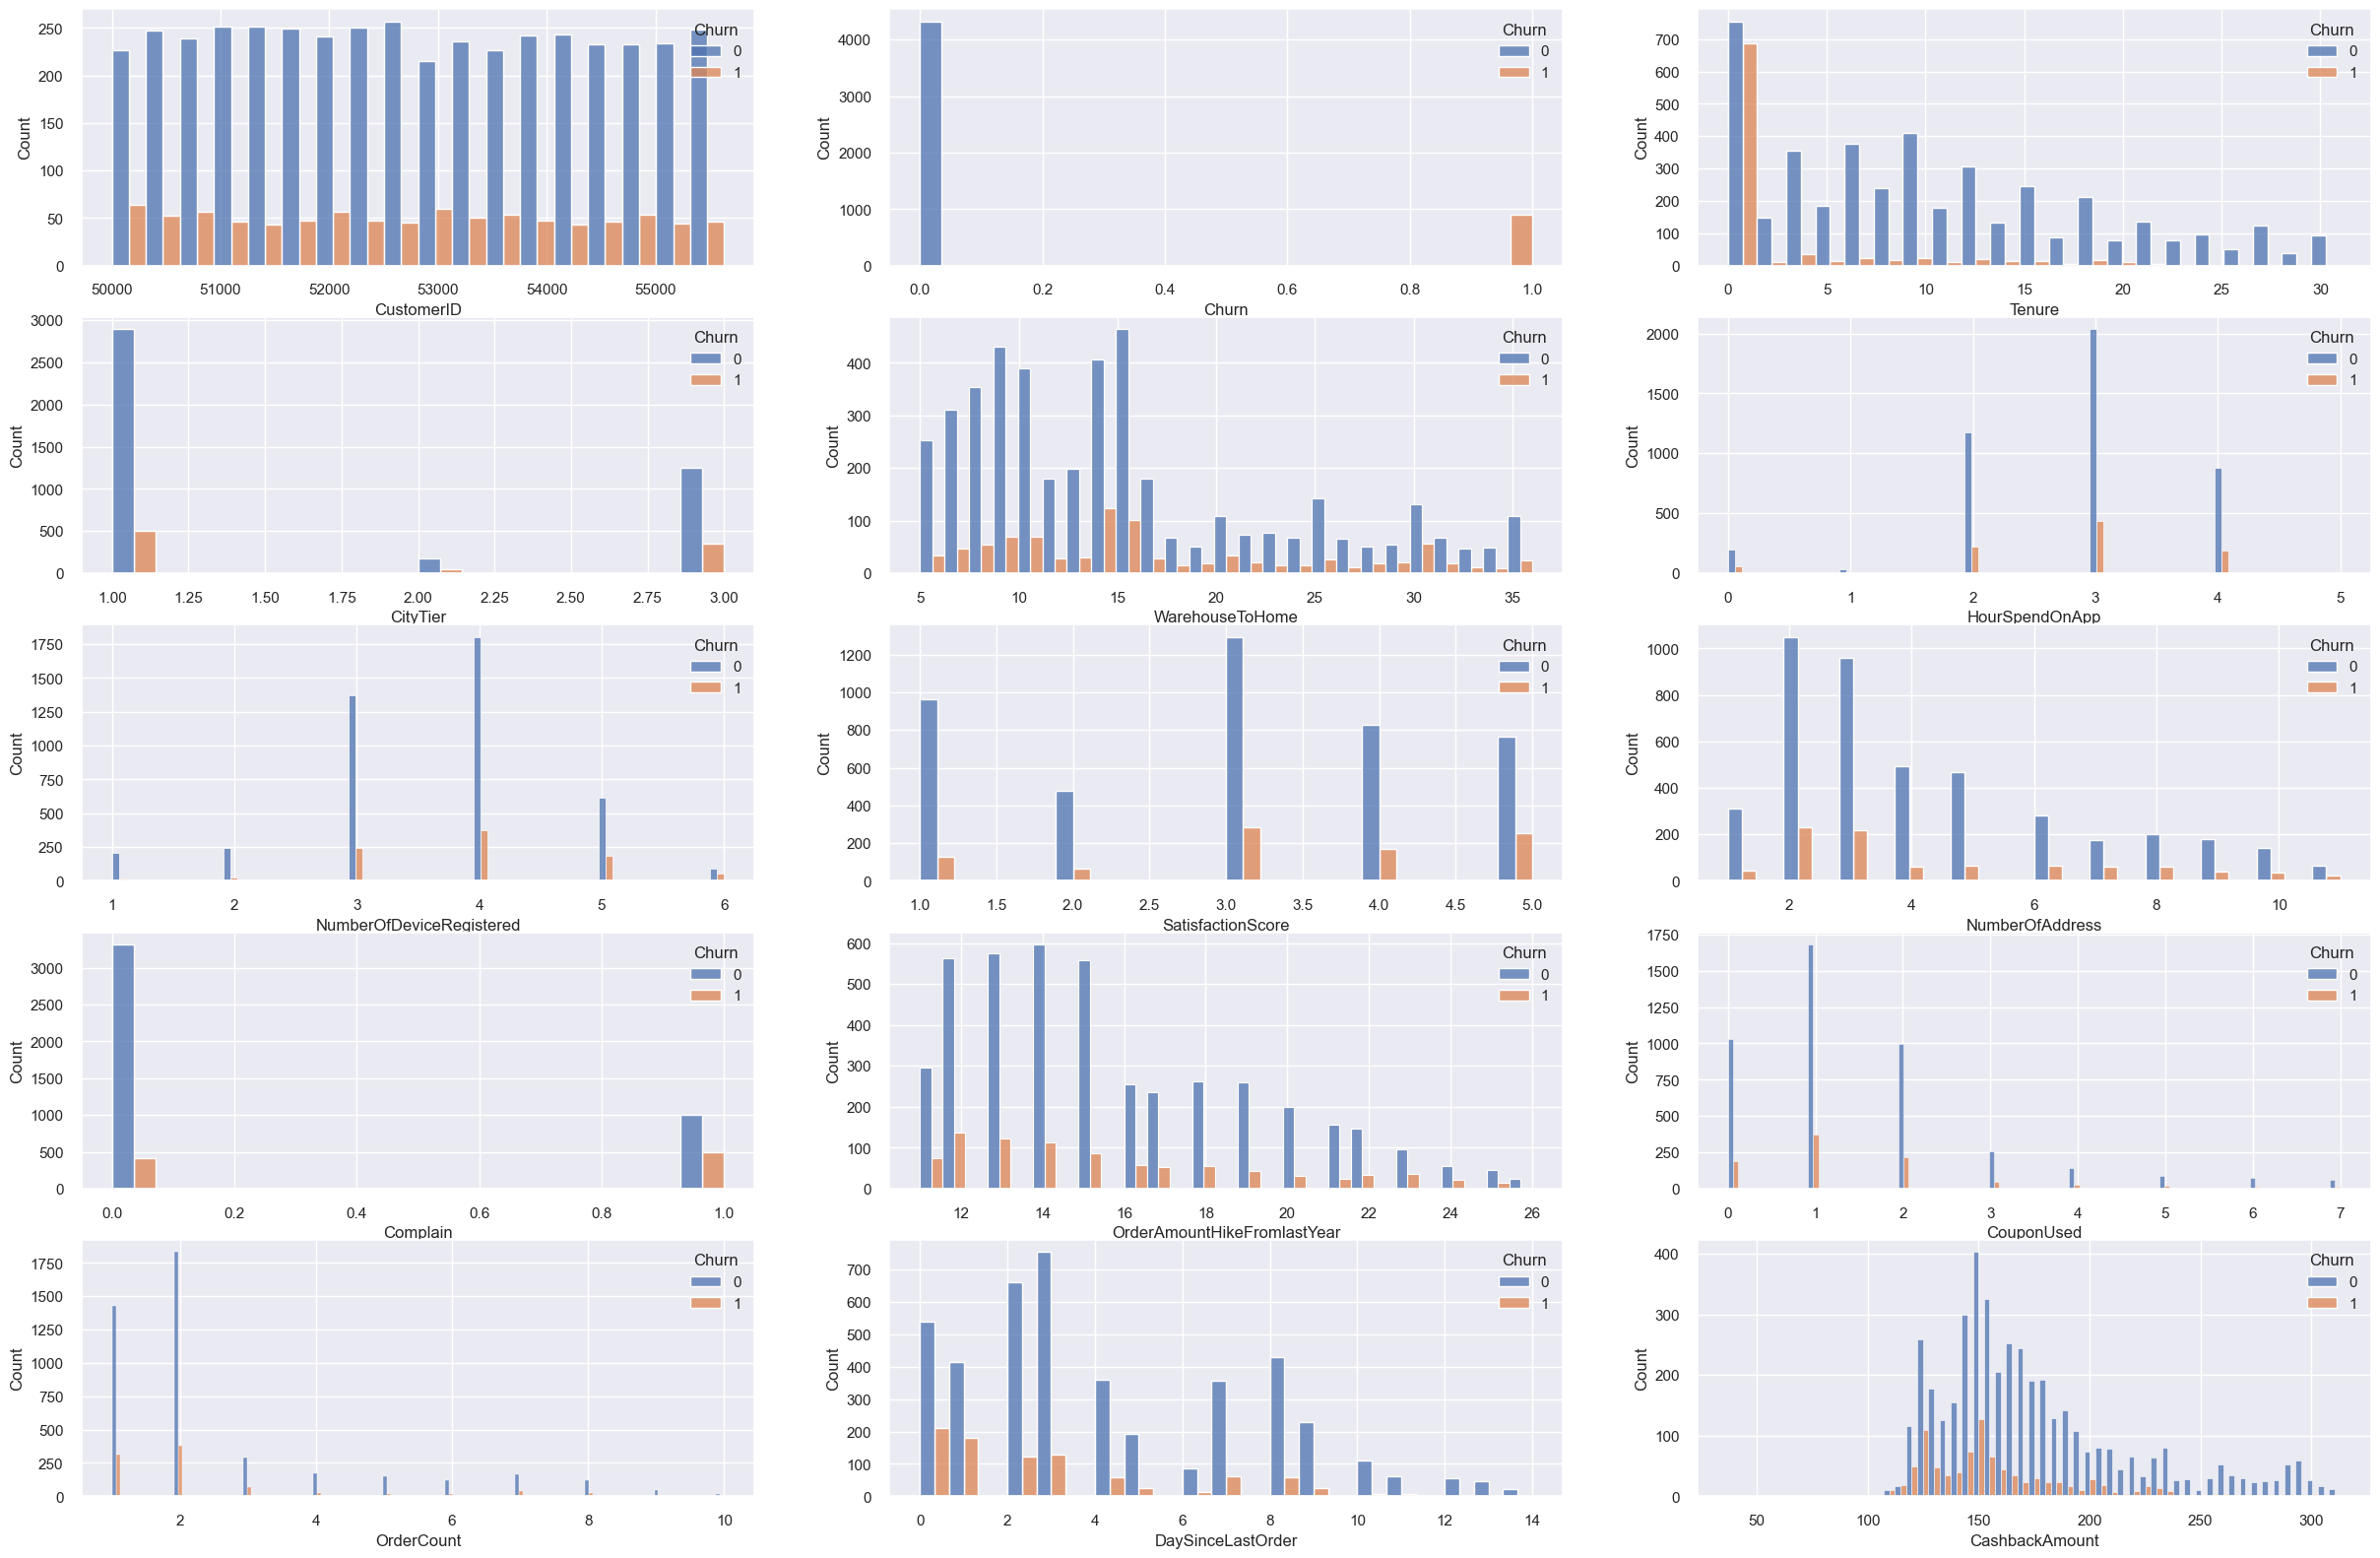

In [27]:
plt.figure(figsize=(30,20), dpi=100)
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=ecom, x=ecom[numerikal[i]], hue='Churn', multiple='dodge')
    plt.tight_layout
plt.show()

Penjelasan
- Tenure = terdapat perbedaan tenura pada customer churn dan non-churn dimana customer churn terjadi ketika nilai tenure lebih kecil (pelanggan/customer yang lebih baru)
- Coupon used = customer yang churn berkumpul pada penggunaan kupon bulan lalu sekitar dibawah 4 (mungkin dari tim bisnis bisa lebih sering memberikan kupon pada customer yang berpotensi churn) 
- order count = customer yang churn berkumpul pada pesanan 1/2 pada bulan kemarin
- cashback amount = customer yang churn lebih memiliki rata" cashback lebih sedikit bisa dilihat pada persebaran datanya semua customer churn memiliki cashback rata" dibawah 250

### Membagi bila skew tinggi menggunakan anova, bila skew rendah dan berdistribusi normal menggunakan t-test

In [28]:
using_ttest = []
using_anova = []
for col in numerikal:
    skewvalue = ecom[col].skew(axis=0, skipna=True)
    if skewvalue <1 and skewvalue > -1:
        print('Distribusi Normal atau skew tidak parah')
        print('Nilai Skew : ',skewvalue)
        print(col, ": T-TEST")
        using_ttest.append(col)
        print('------------------------------------------------------------------------')
    else:
        print('Tidak berdistribusi Normal, menggunakan anova')
        print('Nilai Skew : ',skewvalue)
        print(col, ": ANOVA")
        using_anova.append(col)
        print('------------------------------------------------------------------------')

Distribusi Normal atau skew tidak parah
Nilai Skew :  0.027676463155747195
CustomerID : T-TEST
------------------------------------------------------------------------
Tidak berdistribusi Normal, menggunakan anova
Nilai Skew :  1.733239490819445
Churn : ANOVA
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.7872569814179642
Tenure : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.7309361727103123
CityTier : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  0.9277393796695116
WarehouseToHome : T-TEST
------------------------------------------------------------------------
Distribusi Normal atau skew tidak parah
Nilai Skew :  -0.9877122000321574
HourSpendOnApp : T-TEST
------------------------------------------------------------------------

### T-Test sebagai perbandingan 

In [29]:
# Using T-TEST
feature_selection_ttest = []
def plotperbandingan(df, variabel):
    variabel =f'{variabel}'
    mean_churn = round(df[df['Churn']==1][variabel].mean(),2)
    mean_nonchurn = round(df[df['Churn']==0][variabel].mean(),2)
    
    sns.histplot(data=df, x=variabel, hue="Churn", kde=True, palette=['g', 'red'])
    
    plt.axvline(mean_churn, linestyle='--', color='red', label="mean_churn")
    plt.axvline(mean_nonchurn, linestyle='--', color='red', label="mean_nonchurn")
    
    plt.title(f'Sebaran {variabel} Rata-rata Churn : {mean_churn} \n rata-rata non-churn {mean_nonchurn}')
    plt.show()
    
    tenure_churn = df[df['Churn']==1][variabel]
    tenure_nonchurn = ecom[ecom['Churn']==0][variabel]
    t_stats, p =ttest_ind(tenure_churn, tenure_nonchurn)

    if p<0.05:
        print(f'Perbedaan signifikan karena p-value sebesar {p}')
        return feature_selection_ttest.append(variabel)
    else:
        print(f'Perbedaan tidak signifikan karena p-value sebesar {p}')
    

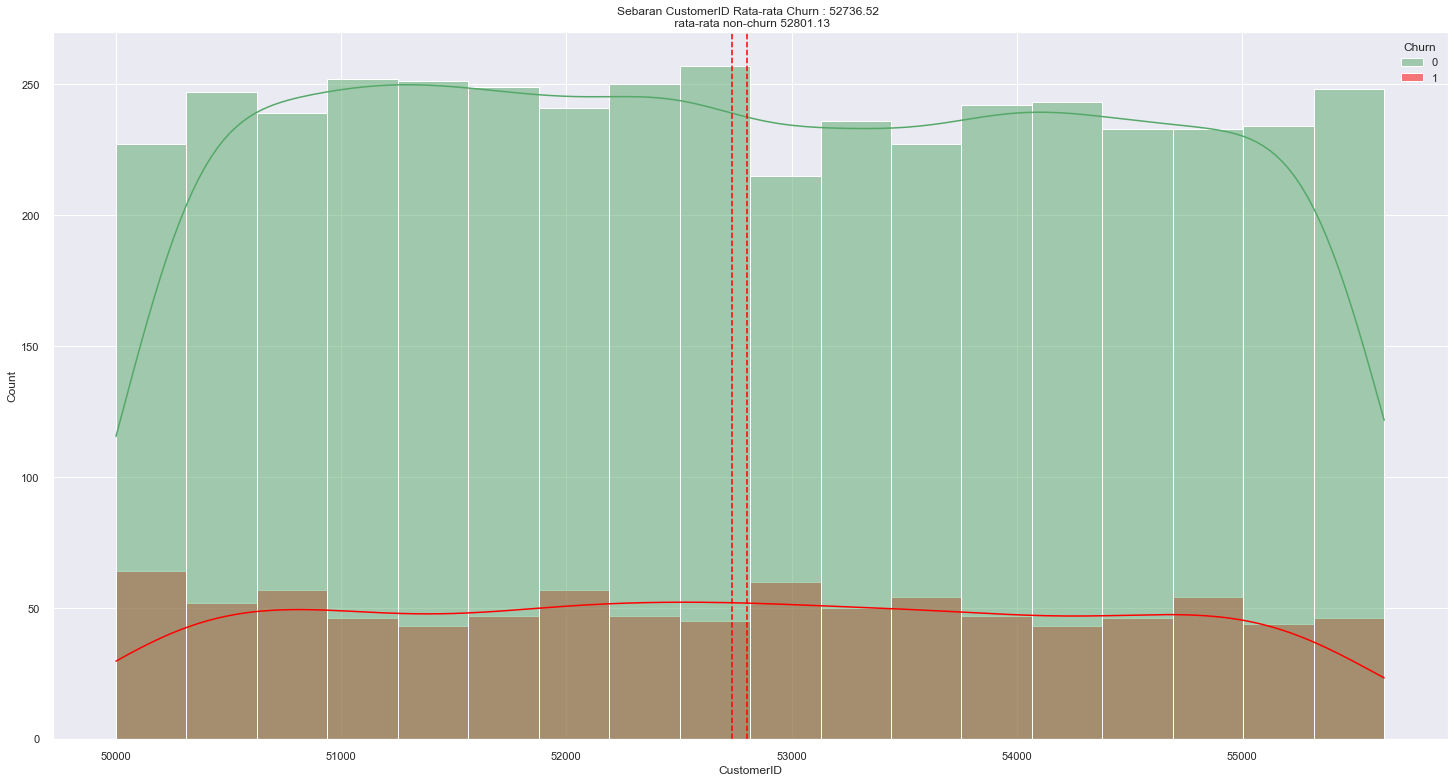

Perbedaan tidak signifikan karena p-value sebesar 0.27756556408653776


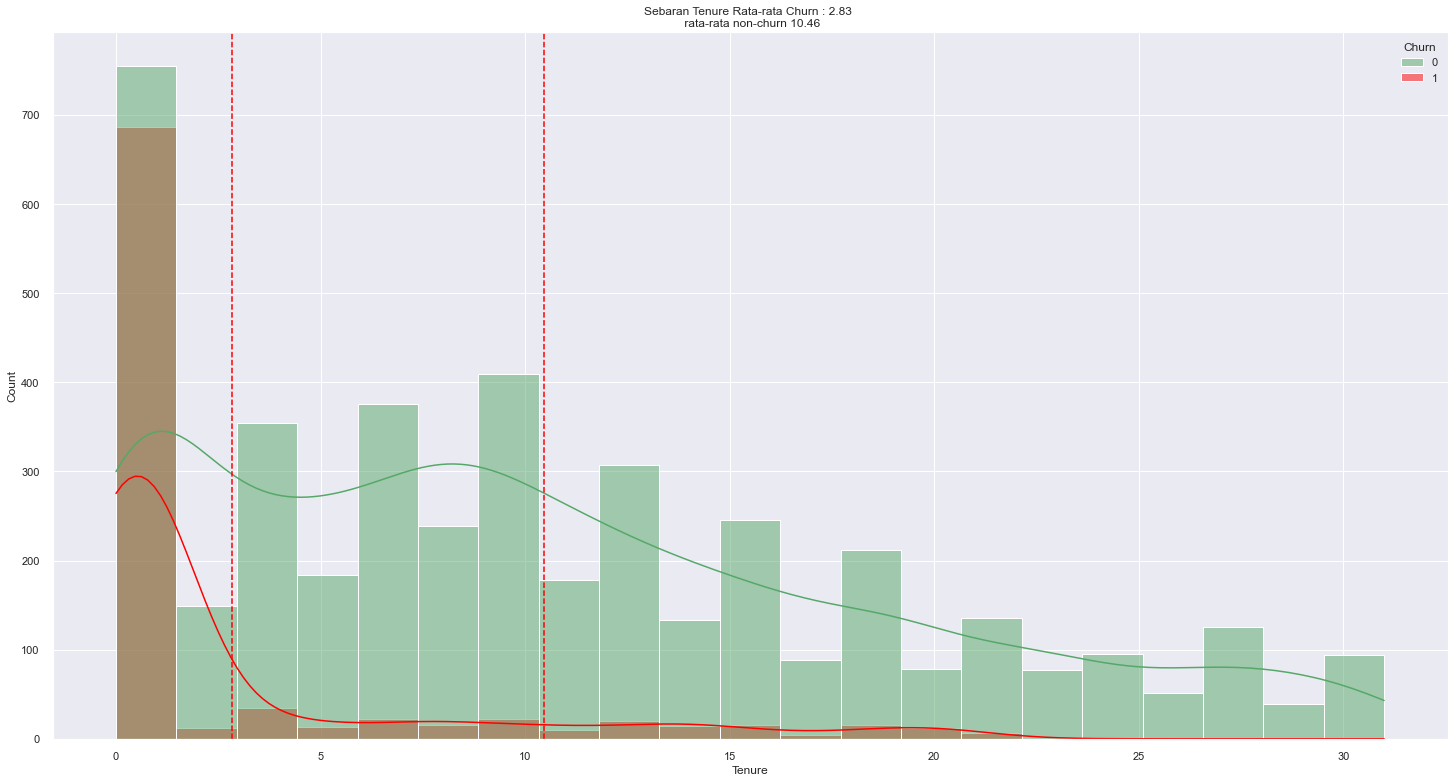

Perbedaan signifikan karena p-value sebesar 2.803167468847004e-146


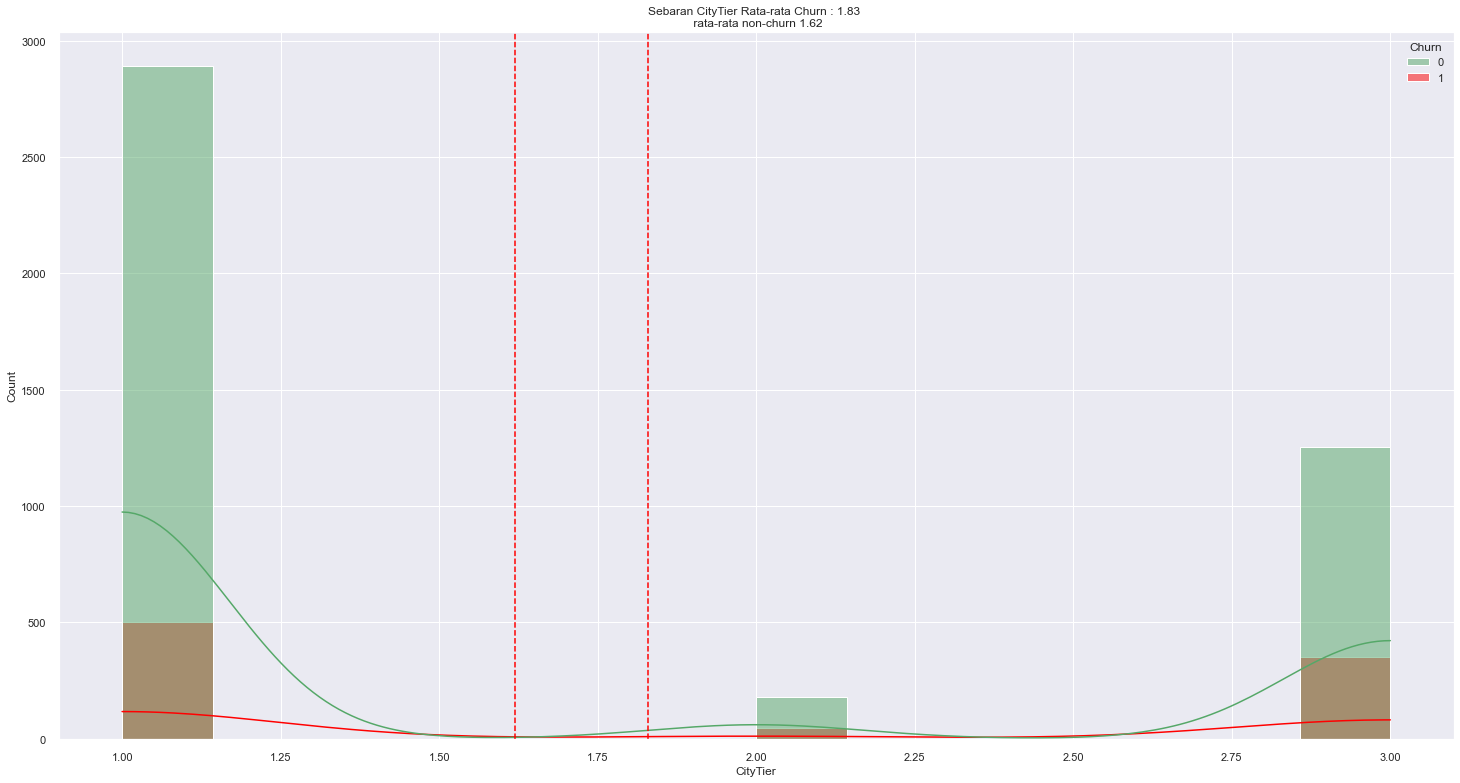

Perbedaan signifikan karena p-value sebesar 4.4194403849646237e-10


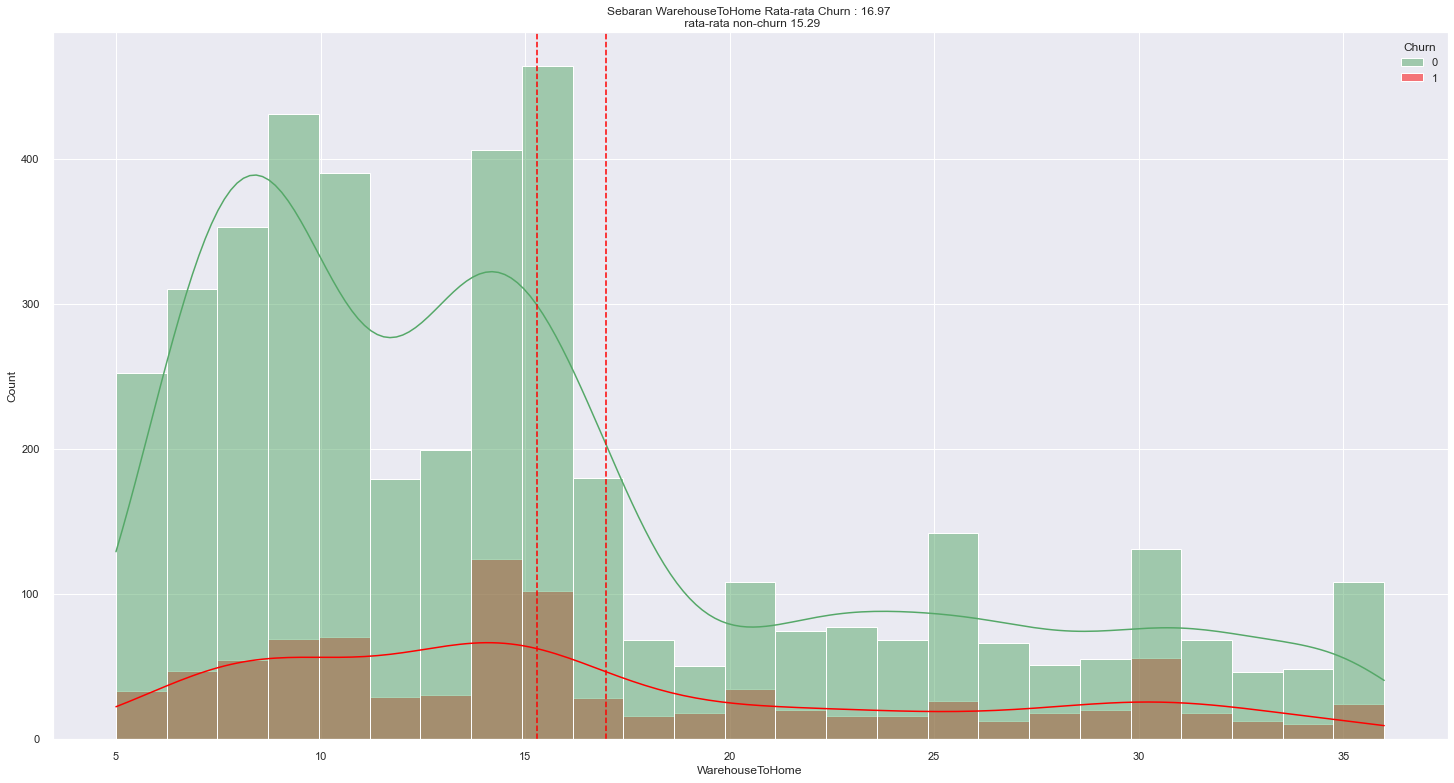

Perbedaan signifikan karena p-value sebesar 1.4074161244588265e-08


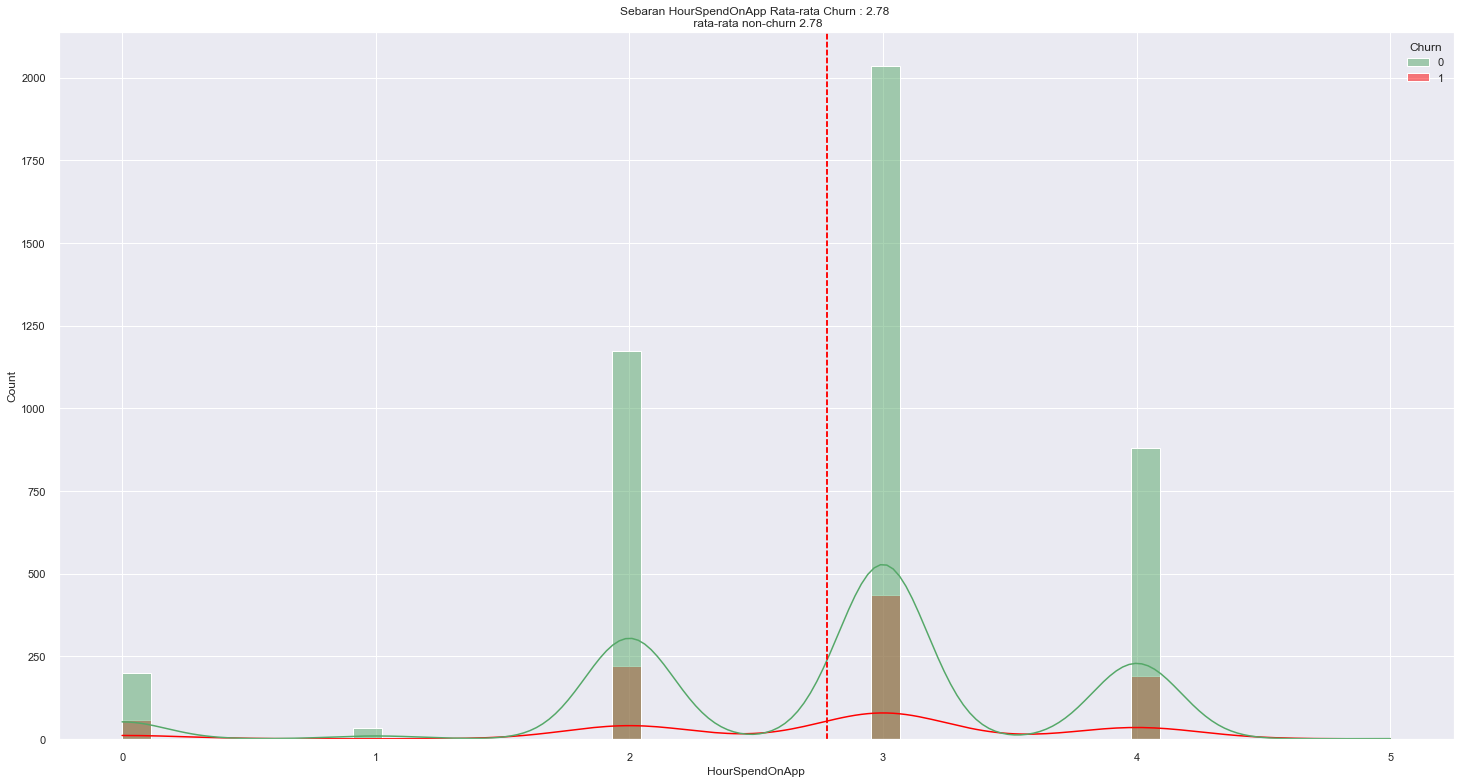

Perbedaan tidak signifikan karena p-value sebesar 0.973451283294244


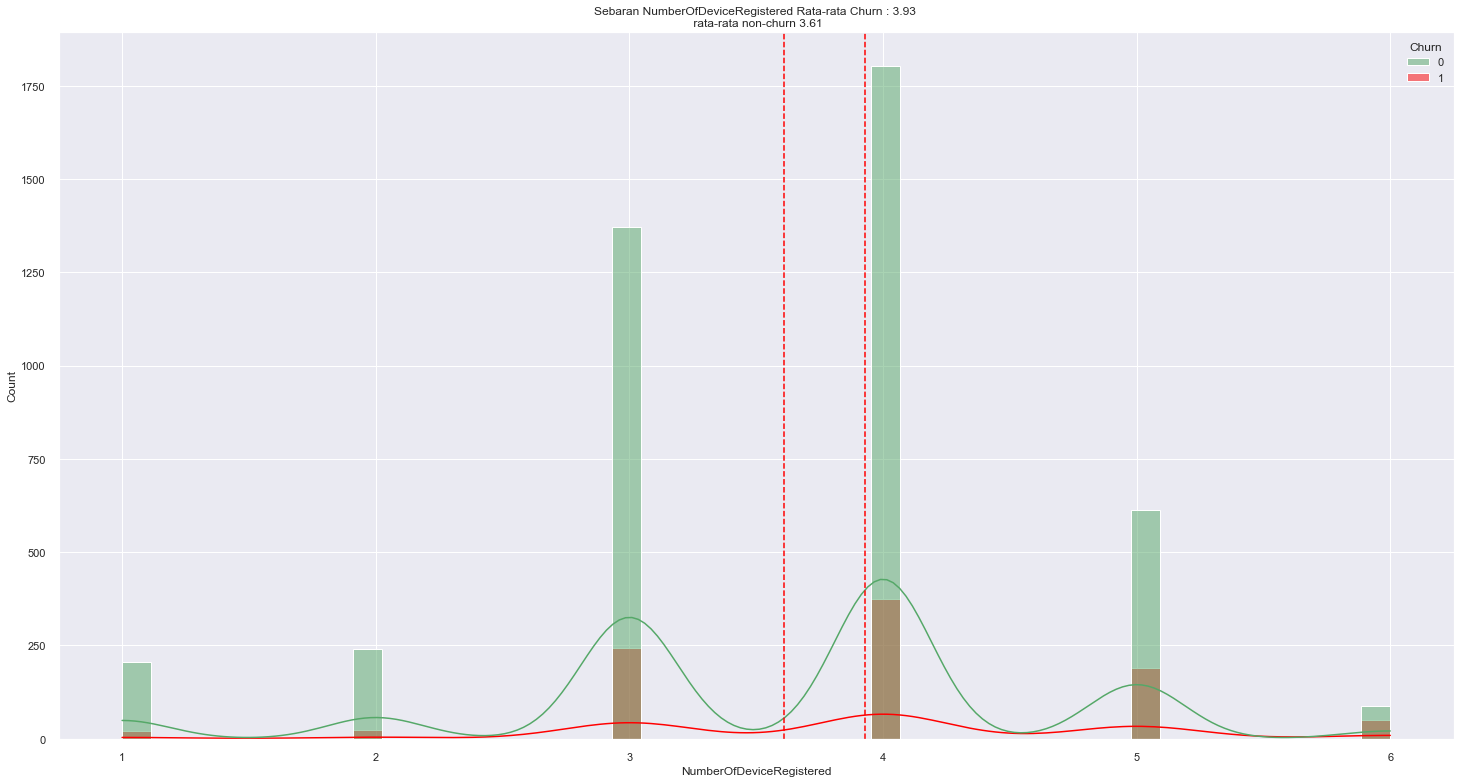

Perbedaan signifikan karena p-value sebesar 6.722357089897346e-18


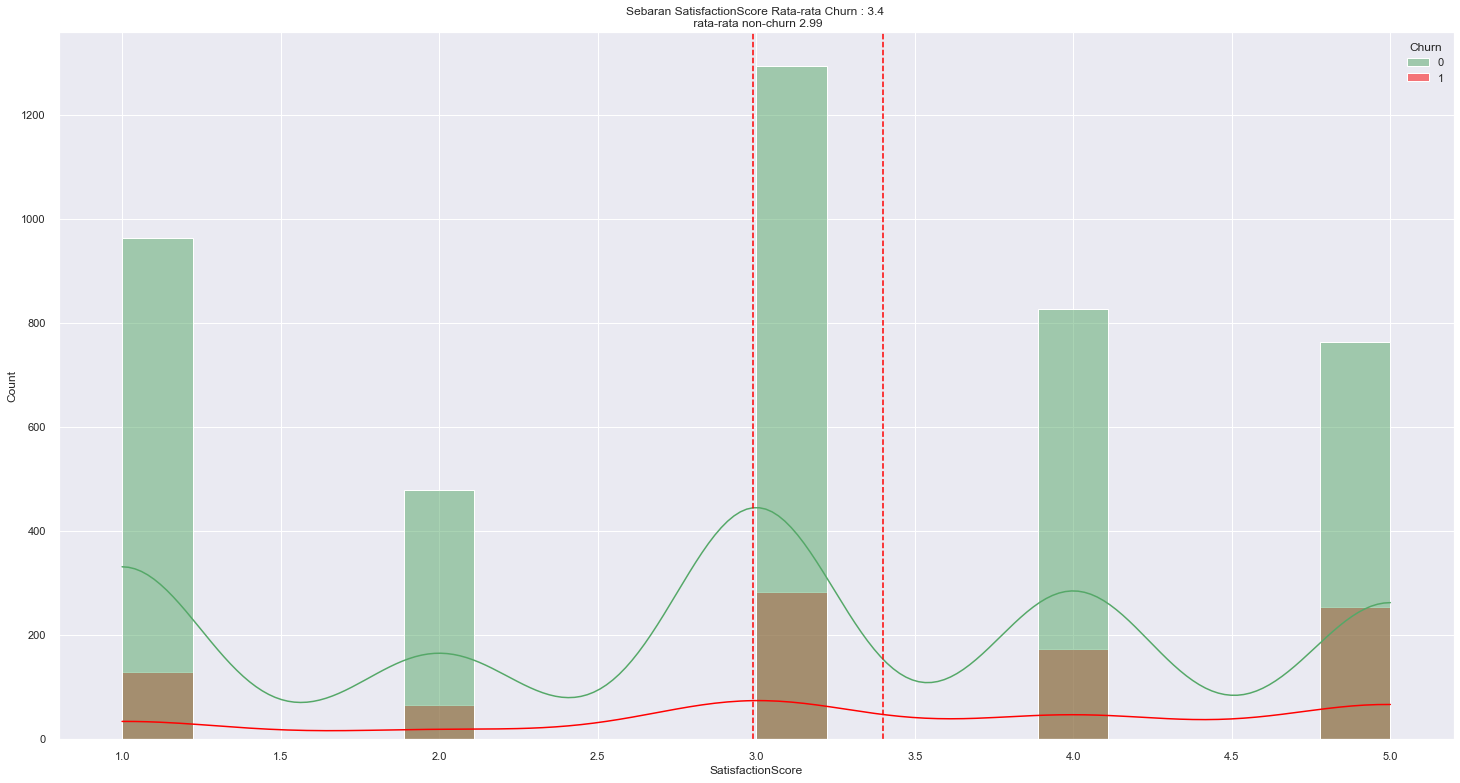

Perbedaan signifikan karena p-value sebesar 5.515015886628617e-16


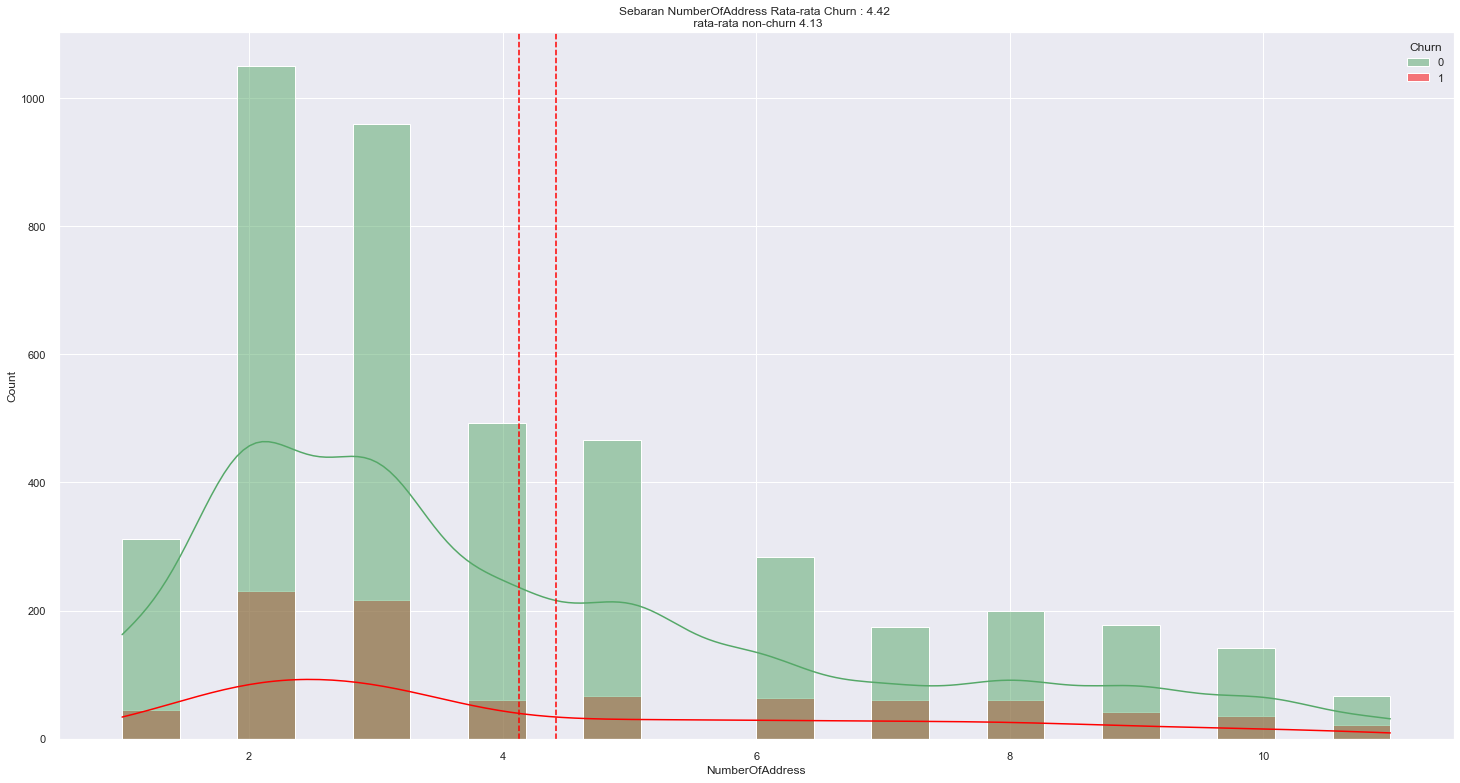

Perbedaan signifikan karena p-value sebesar 0.0019350390235714542


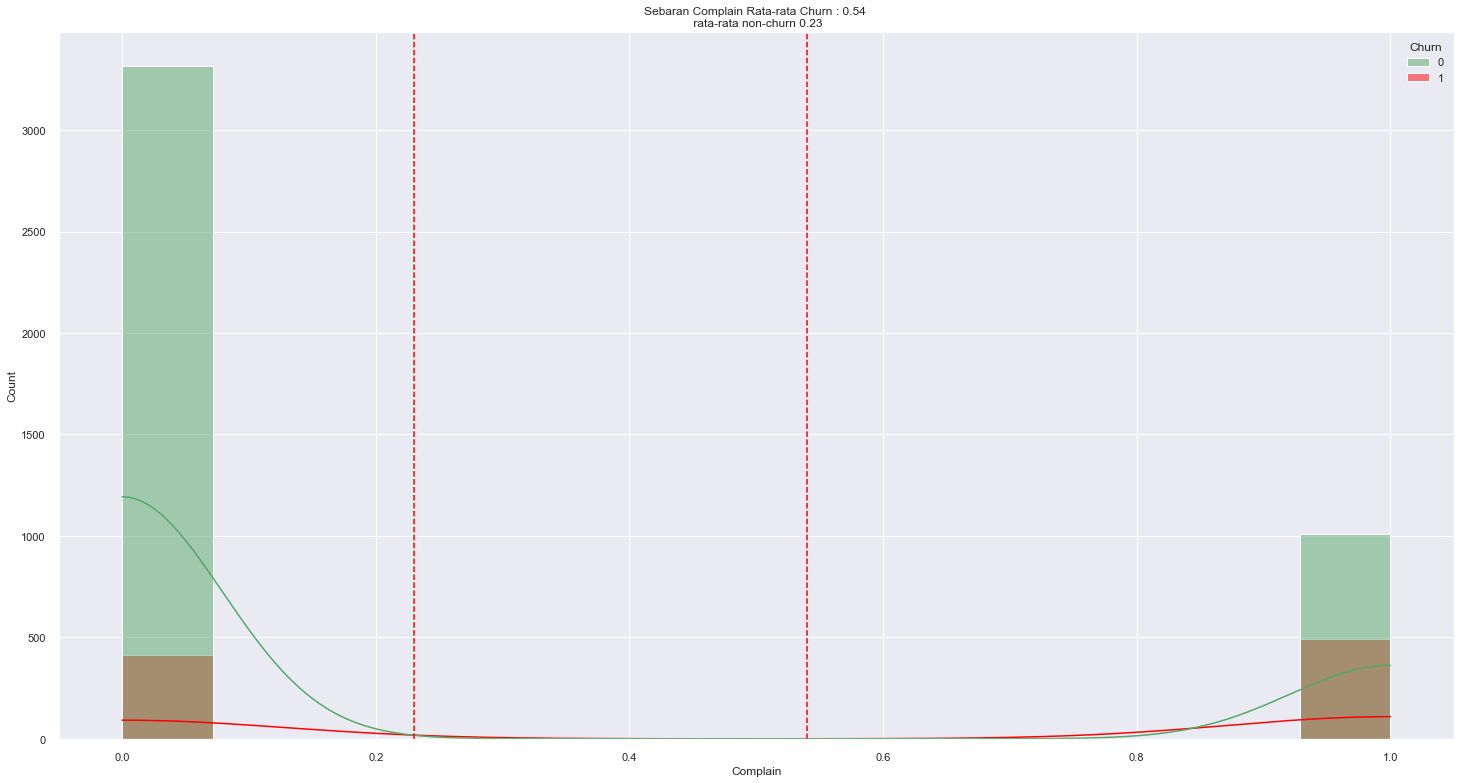

Perbedaan signifikan karena p-value sebesar 3.977383631407595e-81


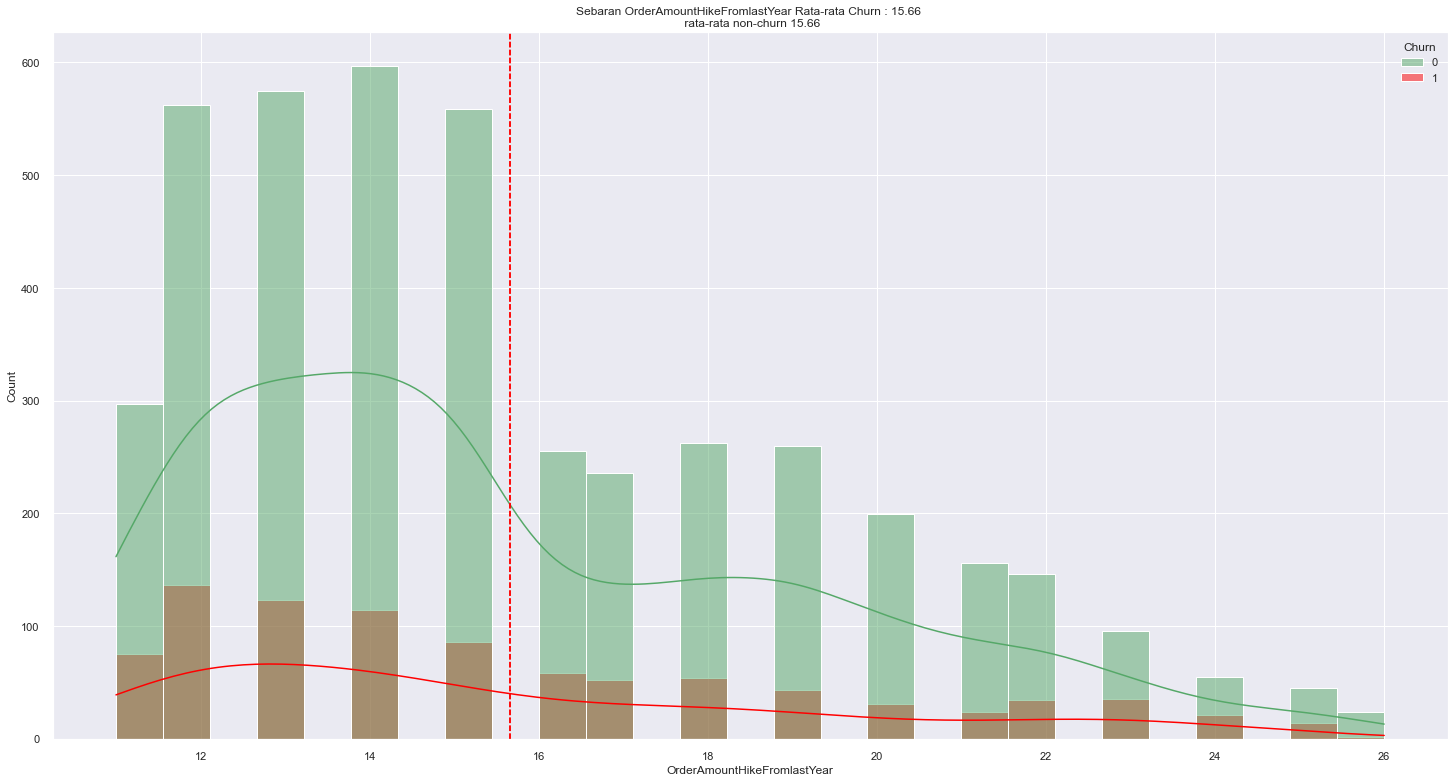

Perbedaan tidak signifikan karena p-value sebesar 0.9931152680514814


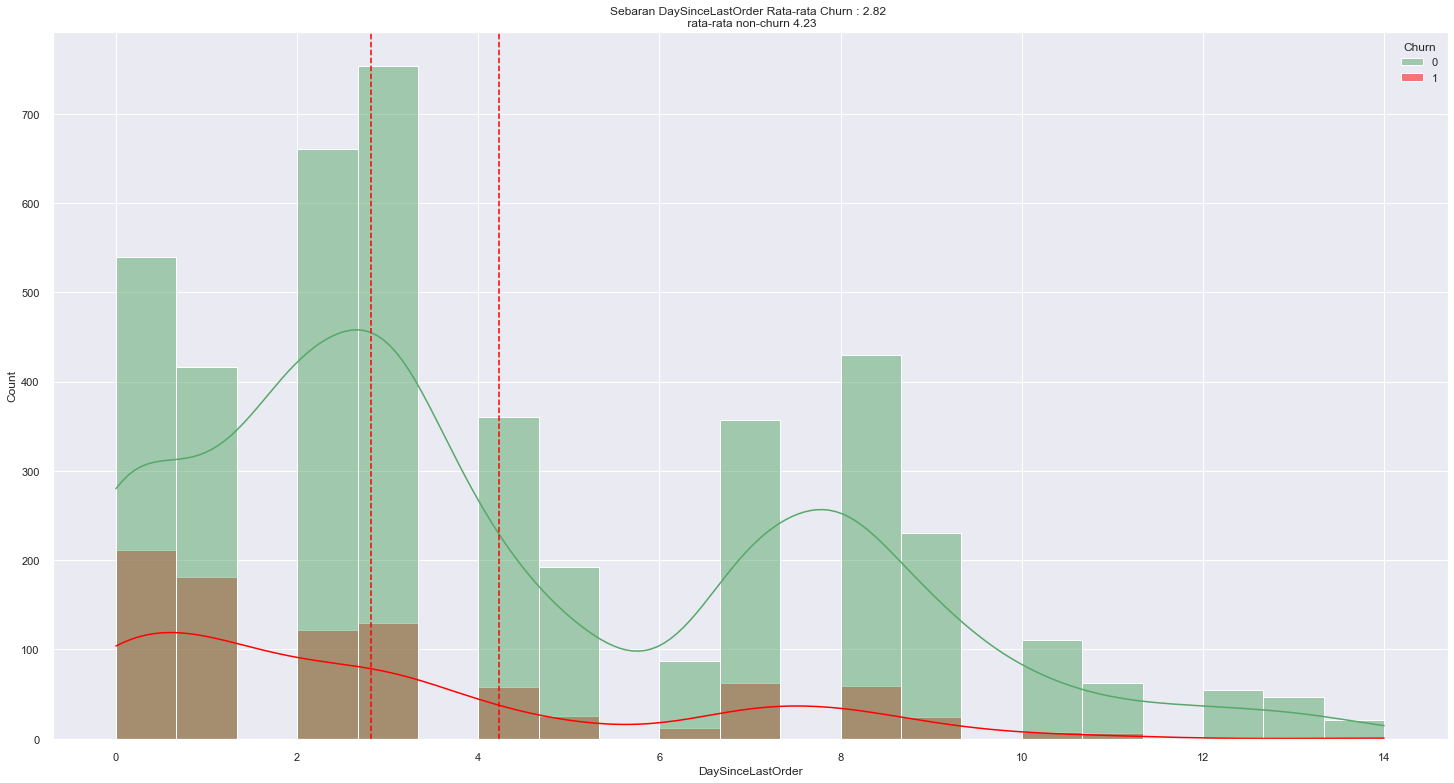

Perbedaan signifikan karena p-value sebesar 1.371501289049294e-31


In [30]:
for col in using_ttest:
    plotperbandingan(ecom, col)

### ANOVA sebagai perbandingan 

In [31]:
# Using ANOVA
feature_selection_anova = []
def plotperbandingananova(df, variabel):
    variabel =f'{variabel}'
    mean_churn = round(df[df['Churn']==1][variabel].mean(),2)
    mean_nonchurn = round(df[df['Churn']==0][variabel].mean(),2)
    
    sns.histplot(data=df, x=variabel, hue="Churn", kde=True, palette=['g', 'red'])
    
    plt.axvline(mean_churn, linestyle='--', color='red', label="mean_churn")
    plt.axvline(mean_nonchurn, linestyle='--', color='red', label="mean_nonchurn")
    
    plt.title(f'Sebaran {variabel} Rata-rata Churn : {mean_churn} \n rata-rata non-churn {mean_nonchurn}')
    plt.show()
    
    tenure_churn = df[df['Churn']==1][variabel]
    tenure_nonchurn = ecom[ecom['Churn']==0][variabel]
    f_stats, pvalue = f_oneway(tenure_churn, tenure_nonchurn)

    if pvalue<0.05:
        print(f'Perbedaan signifikan karena p-value sebesar {pvalue}')
        return feature_selection_anova.append(variabel)
    else:
        print(f'Perbedaan tidak signifikan karena p-value sebesar {pvalue}')
    

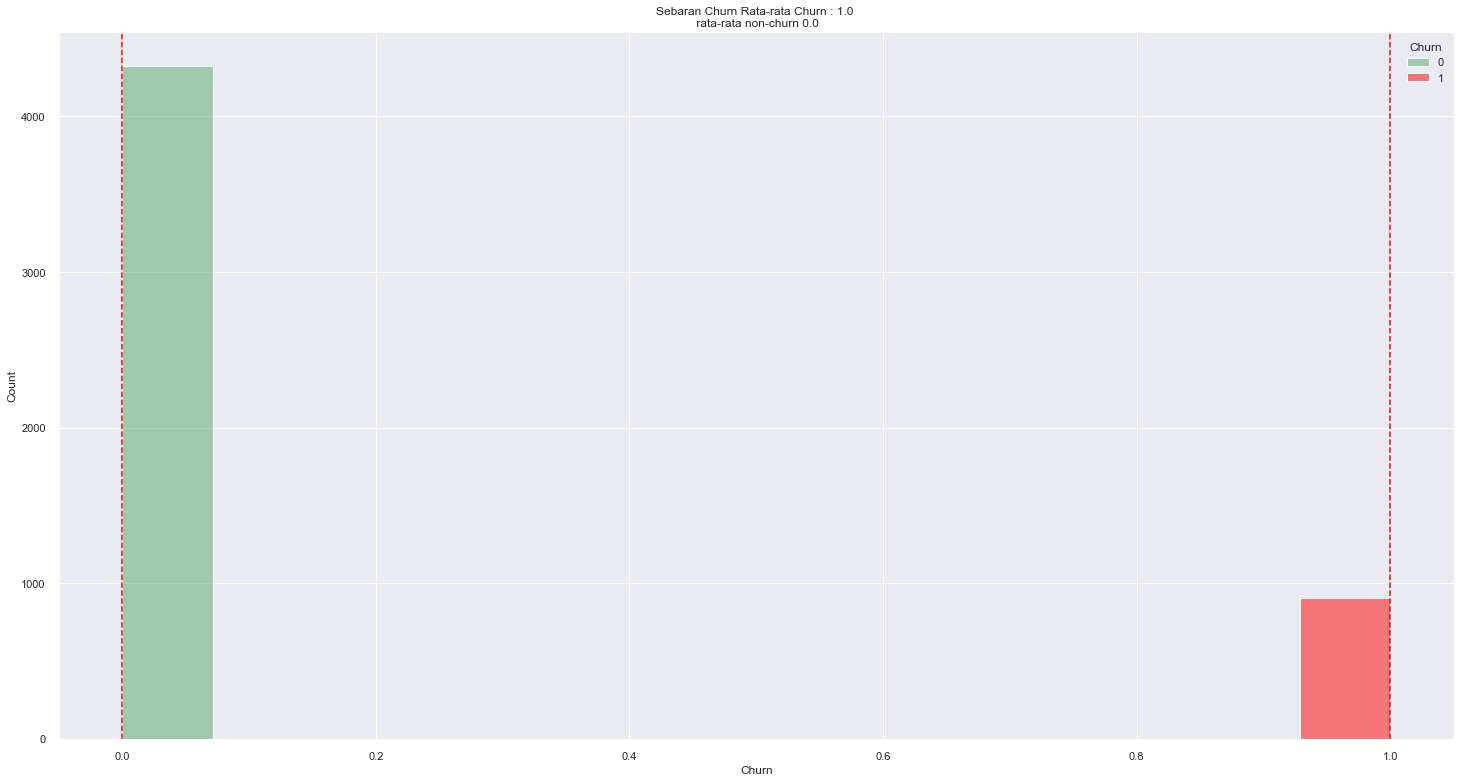

Perbedaan signifikan karena p-value sebesar 0.0


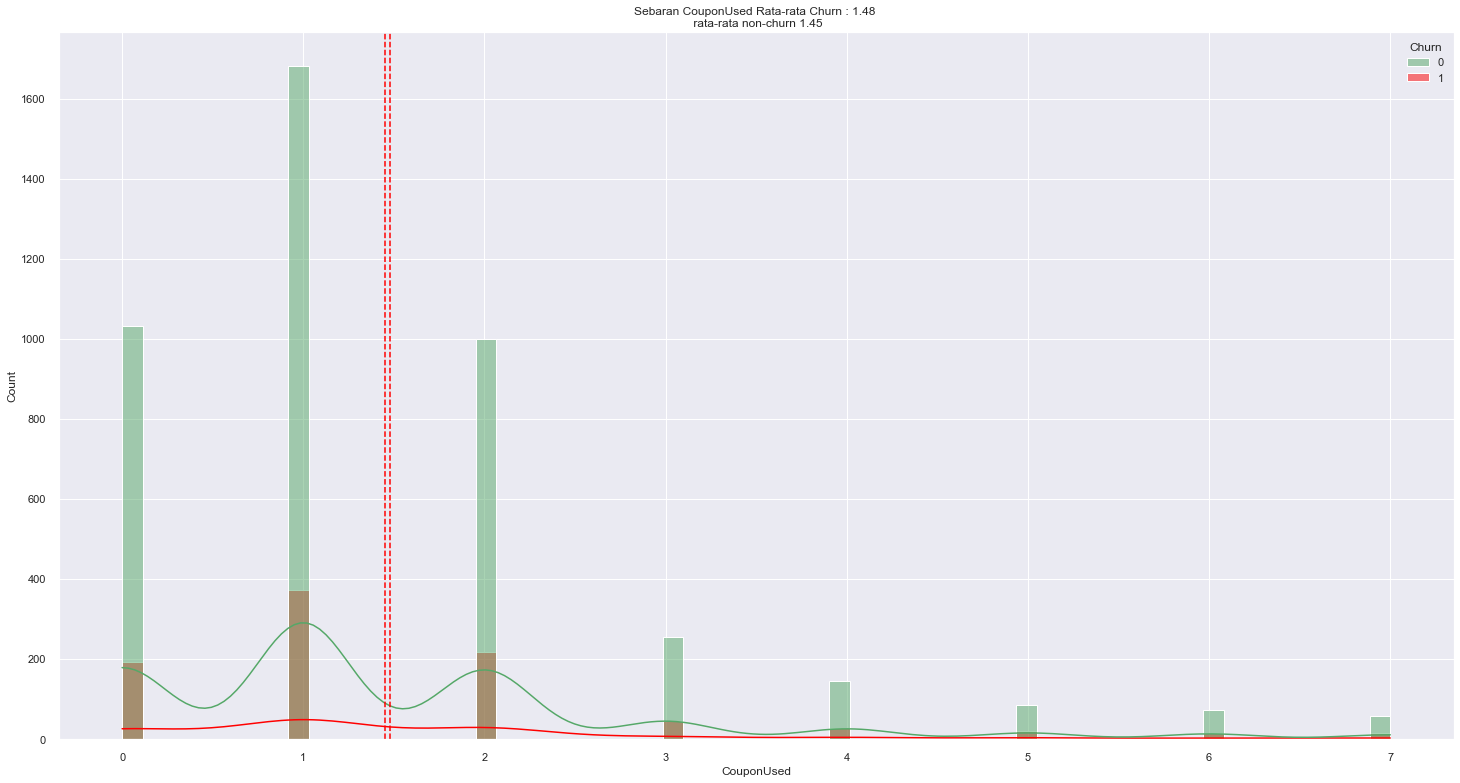

Perbedaan tidak signifikan karena p-value sebesar 0.5387460314744767


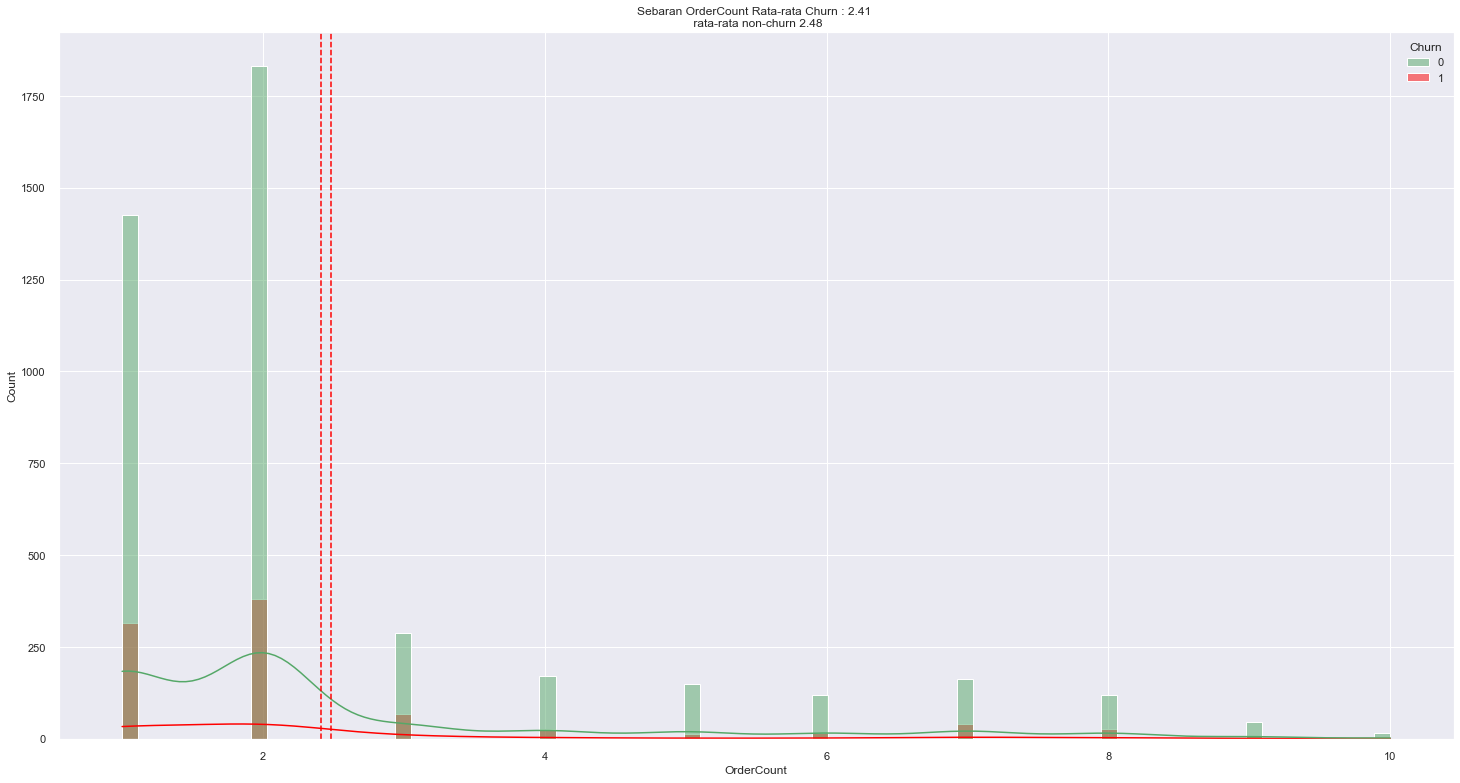

Perbedaan tidak signifikan karena p-value sebesar 0.33115447521029706


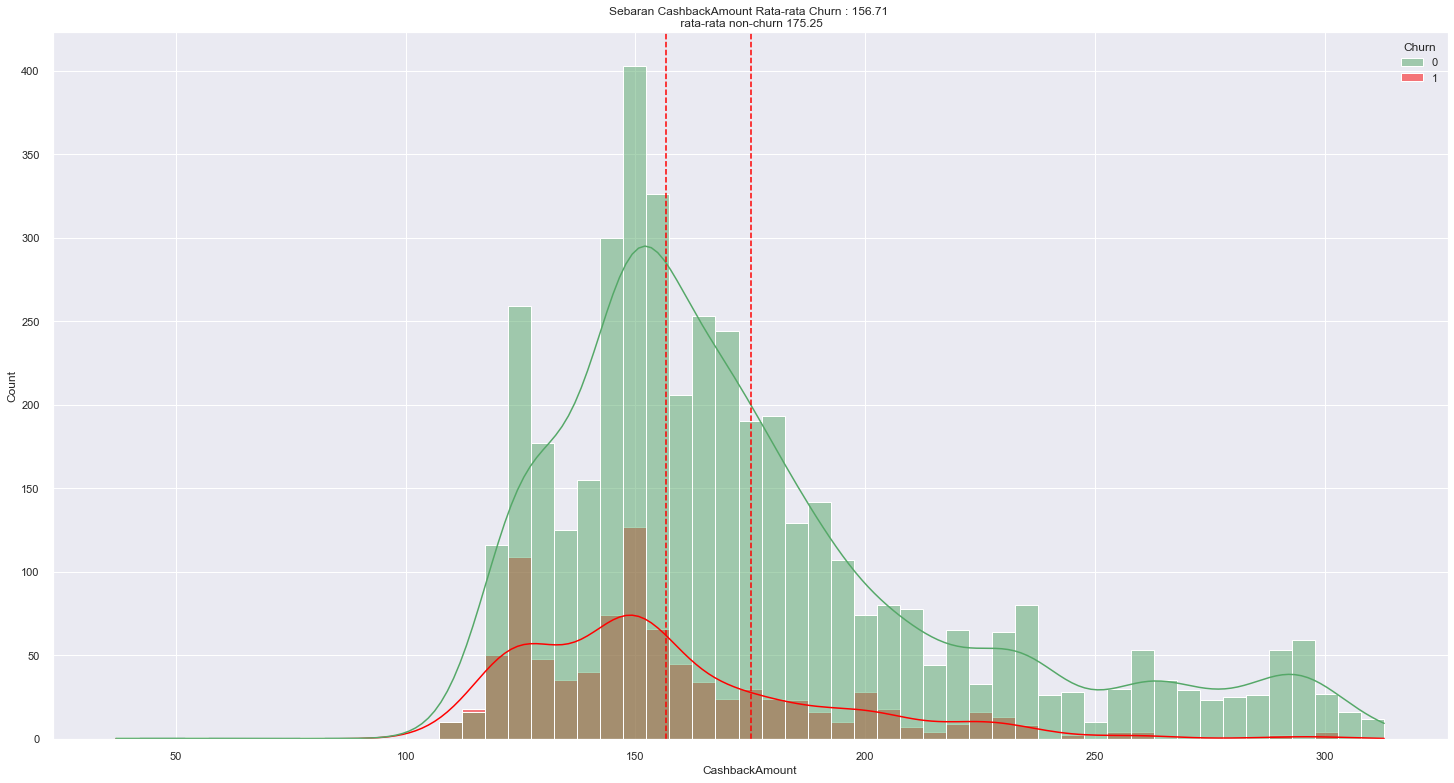

Perbedaan signifikan karena p-value sebesar 1.9342296876612197e-32


In [32]:
for col in using_anova:
    plotperbandingananova(ecom, col)

In [33]:
feature_selection_ttest

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [34]:
feature_selection_anova

['Churn', 'CashbackAmount']

### Menggabungakn nama variabel yang dijadikan feature selection

In [35]:
feature_selection = feature_selection_anova + feature_selection_ttest

In [36]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

<AxesSubplot:>

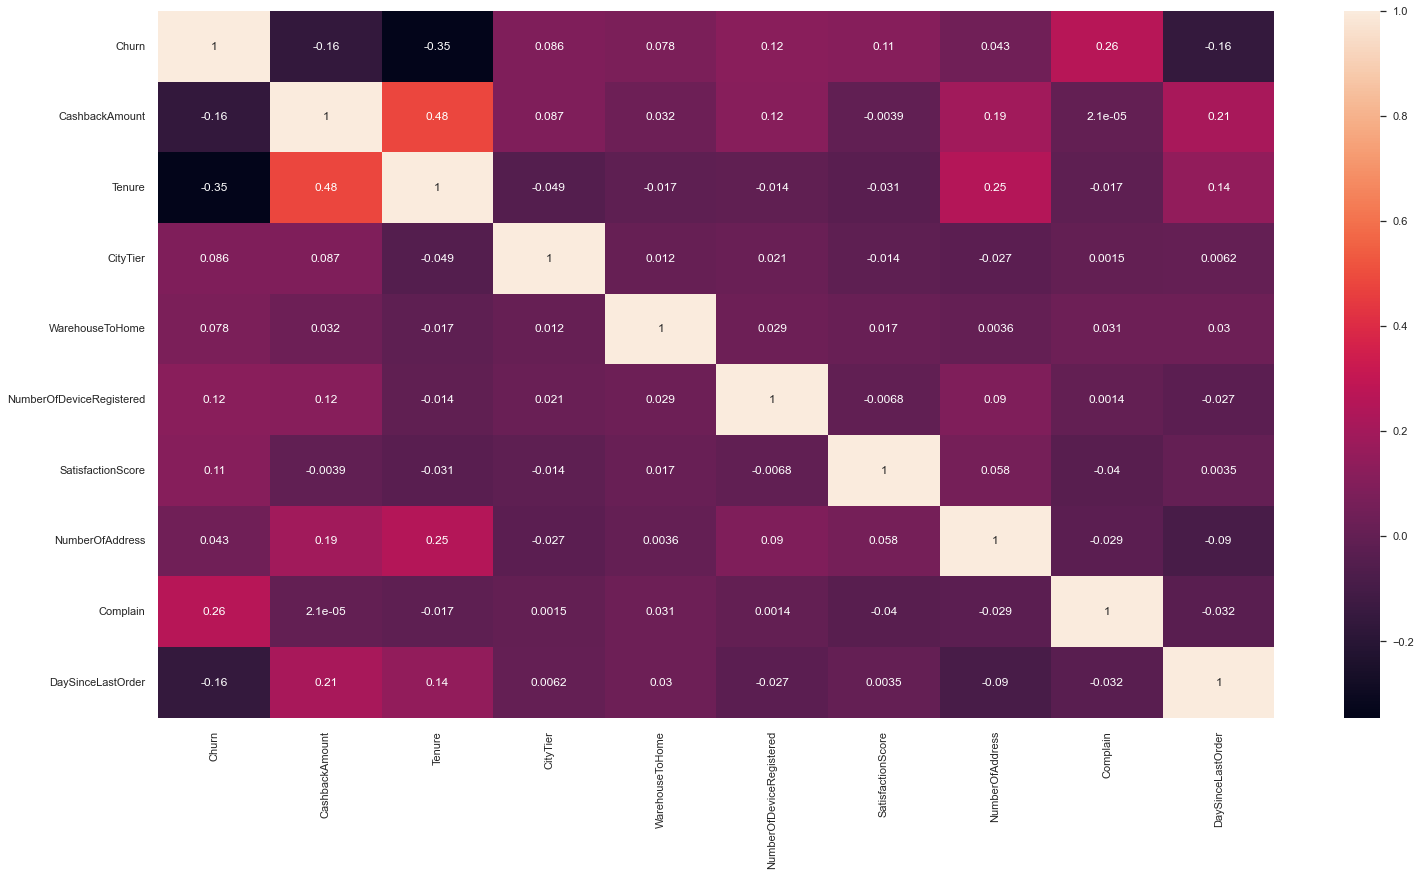

In [37]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom[feature_selection].corr(), annot=True)

In [38]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [39]:
ecom.corr()['Churn'].sort_values(ascending=False)

Churn                          1.000000
Complain                       0.259413
NumberOfDeviceRegistered       0.118839
SatisfactionScore              0.111717
CityTier                       0.086156
WarehouseToHome                0.078365
NumberOfAddress                0.042873
CouponUsed                     0.008505
OrderAmountHikeFromlastYear   -0.000119
HourSpendOnApp                -0.000460
OrderCount                    -0.013445
CustomerID                    -0.015023
DaySinceLastOrder             -0.160745
CashbackAmount                -0.162985
Tenure                        -0.345339
Name: Churn, dtype: float64

Didapatkan hasil dari perbandingan feature selection dan korelasi variabel pada dataset, urutan variabel dari `CouponUsed` hingga `CustomerID` tidak digunakan

# Feature Selection (categorical data)

In [40]:
ecom2 = ecom.copy()

In [41]:
ecom2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [42]:
cat = ecom2.select_dtypes('object')
kategorikal = []
for i in cat.columns:
    kategorikal.append(i)

In [43]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [44]:
kategorikal2 = [
    'CityTier',
    'Complain',
    'Churn'
]

In [45]:
kategorikal = kategorikal +kategorikal2

In [46]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'CityTier',
 'Complain',
 'Churn']

In [47]:
ecom2[kategorikal]

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,CityTier,Complain,Churn
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,3,1,1
1,Phone,UPI,Male,Mobile,Single,1,1,1
2,Phone,Debit Card,Male,Mobile,Single,1,1,1
3,Phone,Debit Card,Male,Laptop & Accessory,Single,3,0,1
4,Phone,CC,Male,Mobile,Single,1,0,1
...,...,...,...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married,1,0,0
5626,Mobile Phone,Credit Card,Male,Fashion,Married,1,0,0
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,1,1,0
5628,Computer,Credit Card,Male,Laptop & Accessory,Married,3,0,0


### Using chi-square

In [48]:
# label encoding for chi-square
for col in kategorikal:
    le = preprocessing.LabelEncoder()
    ecom2[col] = le.fit_transform(ecom2[col])
ecom2[kategorikal].head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,CityTier,Complain,Churn
0,1,4,0,2,2,2,1,1
1,2,6,1,3,2,0,1,1
2,2,4,1,3,2,0,1,1
3,2,4,1,2,2,2,0,1
4,2,0,1,3,2,0,0,1


In [49]:
X = ecom2[kategorikal].drop(columns=['Churn'], axis=1)
y = ecom2['Churn']

In [50]:
chi_scores = chi2(X, y)

In [51]:
chi_scores

(array([  0.42154141,   1.80207041,   2.13317282,  72.92917515,
         39.42582711,  49.5496961 , 250.94399987]),
 array([5.16168912e-01, 1.79462394e-01, 1.44142124e-01, 1.34386845e-17,
        3.40760017e-10, 1.93409820e-12, 1.61674199e-56]))

Semakin memiliki nilai chi-value yang tinggi maka variabel tersebut semakin penting

<AxesSubplot:>

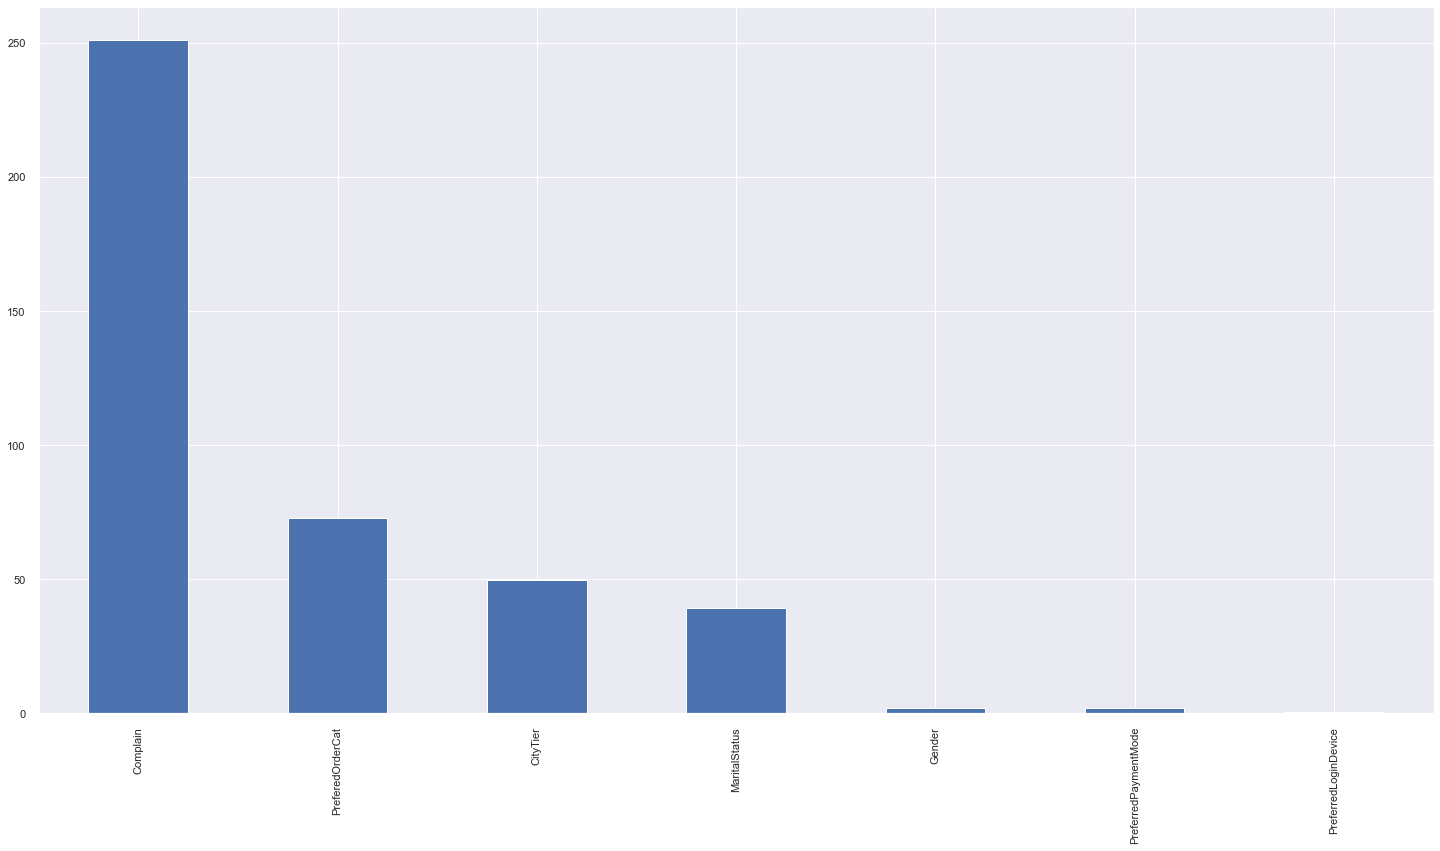

In [52]:
# Higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

jika memiliki p-value lebih dari 0.5 maka dianggap sebagai fitur yang tidak penting dan dibuang

<AxesSubplot:>

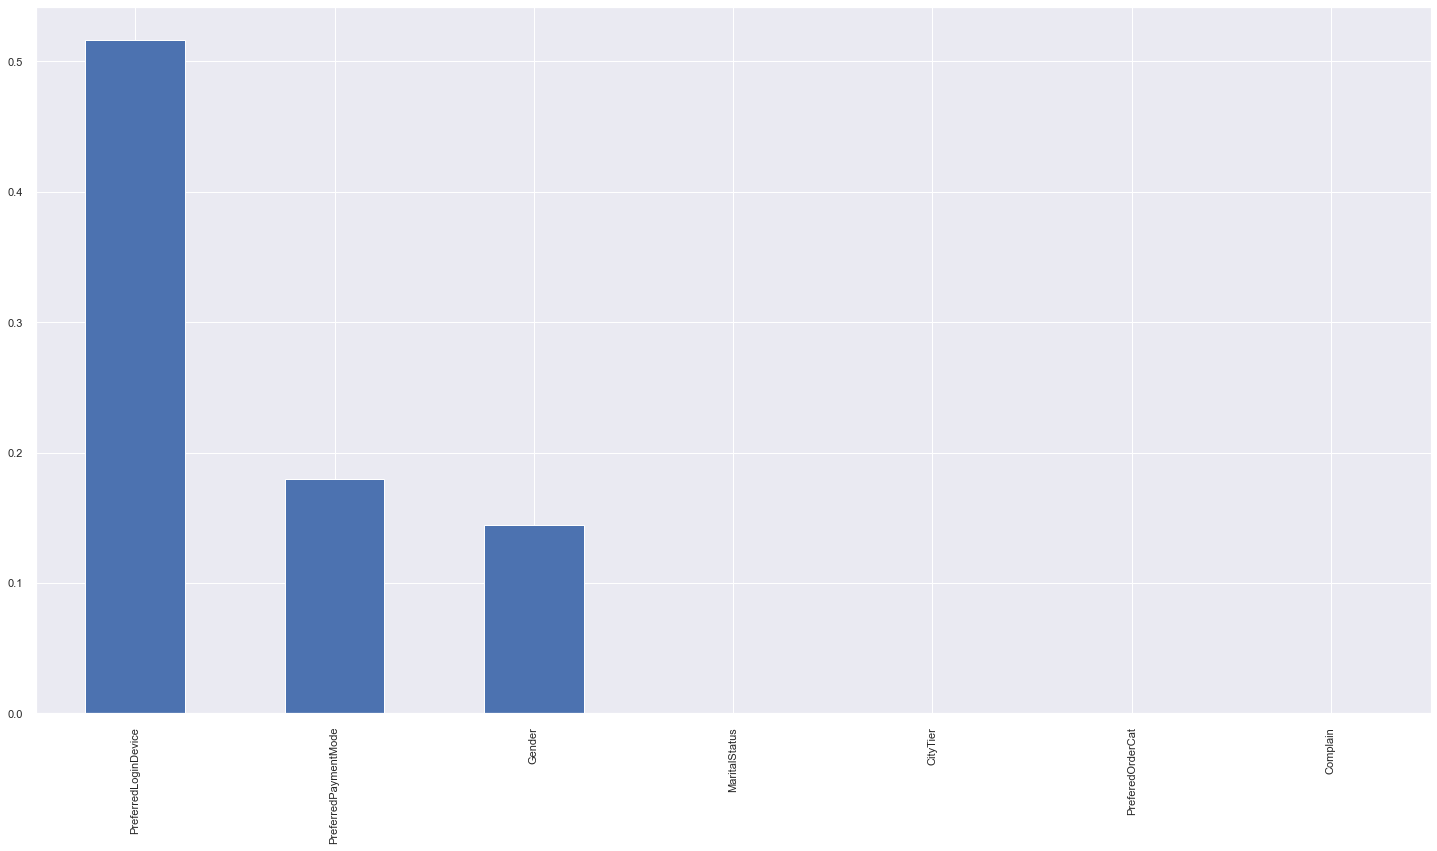

In [53]:
# if p-value > 0.5, lower importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [54]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'CityTier',
 'Complain',
 'Churn']

In [55]:
feature_selection_kategorikal = [
    'PreferredPaymentMode',
    'Gender',
    'MaritalStatus',
    'PreferedOrderCat'
]

Dari feature selection yang dilakukan didapatkan feature berikut ini yang akan dipakai untuk modeling

In [56]:
feature_selection

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder']

In [57]:
feature = feature_selection + feature_selection_kategorikal

In [58]:
feature

['Churn',
 'CashbackAmount',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'PreferredPaymentMode',
 'Gender',
 'MaritalStatus',
 'PreferedOrderCat']

# Categorical handling

Pada handling feature kategorikal disini saya menggunakan onehot encoding dan menggunakan label encoder

In [59]:
ecom[feature].head()

,Churn,CashbackAmount,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,PreferredPaymentMode,Gender,MaritalStatus,PreferedOrderCat
0,1,159.93,4.0,3,6.0,3,2,9,1,5.0,Debit Card,Female,Single,Laptop & Accessory
1,1,120.90,0.0,1,8.0,4,3,7,1,0.0,UPI,Male,Single,Mobile
2,1,120.28,0.0,1,30.0,4,3,6,1,3.0,Debit Card,Male,Single,Mobile
3,1,134.07,0.0,3,15.0,4,5,8,0,3.0,Debit Card,Male,Single,Laptop & Accessory
4,1,129.60,0.0,1,12.0,3,5,3,0,3.0,CC,Male,Single,Mobile


In [60]:
for col in feature:
    print(col, ": ", ecom[col].nunique())

Churn :  2
CashbackAmount :  2415
Tenure :  32
CityTier :  3
WarehouseToHome :  32
NumberOfDeviceRegistered :  6
SatisfactionScore :  5
NumberOfAddress :  11
Complain :  2
DaySinceLastOrder :  15
PreferredPaymentMode :  7
Gender :  2
MaritalStatus :  3
PreferedOrderCat :  6


Categorical Handling sebagai berikut:
- OneHot encoding:
    - Gender
    - Marital Status
- Label Encoder:
    - PreferredPaymentMode 
    - PreferedOrderCat

In [61]:
onehot = [
    'Gender',
    'MaritalStatus'
]
labelenc = [
    'PreferredPaymentMode',
    'PreferedOrderCat'
]

In [62]:
features = ecom[feature]

In [63]:
features[labelenc]

,PreferredPaymentMode,PreferedOrderCat
0,Debit Card,Laptop & Accessory
1,UPI,Mobile
2,Debit Card,Mobile
3,Debit Card,Laptop & Accessory
4,CC,Mobile
...,...,...
5625,Credit Card,Laptop & Accessory
5626,Credit Card,Fashion
5627,Debit Card,Laptop & Accessory
5628,Credit Card,Laptop & Accessory


In [64]:
# Label Encoding
features[labelenc] = features[labelenc].apply(preprocessing.LabelEncoder().fit_transform)
# onehot
features = pd.get_dummies(features, columns=onehot)

In [65]:
features.head()

,Churn,CashbackAmount,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,PreferredPaymentMode,PreferedOrderCat,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,159.93,4.0,3,6.0,3,2,9,1,5.0,4,2,1,0,0,0,1
1,1,120.90,0.0,1,8.0,4,3,7,1,0.0,6,3,0,1,0,0,1
2,1,120.28,0.0,1,30.0,4,3,6,1,3.0,4,3,0,1,0,0,1
3,1,134.07,0.0,3,15.0,4,5,8,0,3.0,4,2,0,1,0,0,1
4,1,129.60,0.0,1,12.0,3,5,3,0,3.0,0,3,0,1,0,0,1


In [66]:
features.shape

(5226, 17)

In [67]:
features['Churn'].value_counts()

0    4324
1     902
Name: Churn, dtype: int64

([<matplotlib.patches.Wedge at 0x2bcf653aa00>,
 [Text(-0.9422135837353779, 0.5676562010799638, 'No Churn'),
  Text(0.942213583735378, -0.5676562010799635, 'Churn')],
 [Text(-0.5139346820374788, 0.3096306551345257, '82.7%'),
  Text(0.5139346820374788, -0.3096306551345255, '17.3%')])

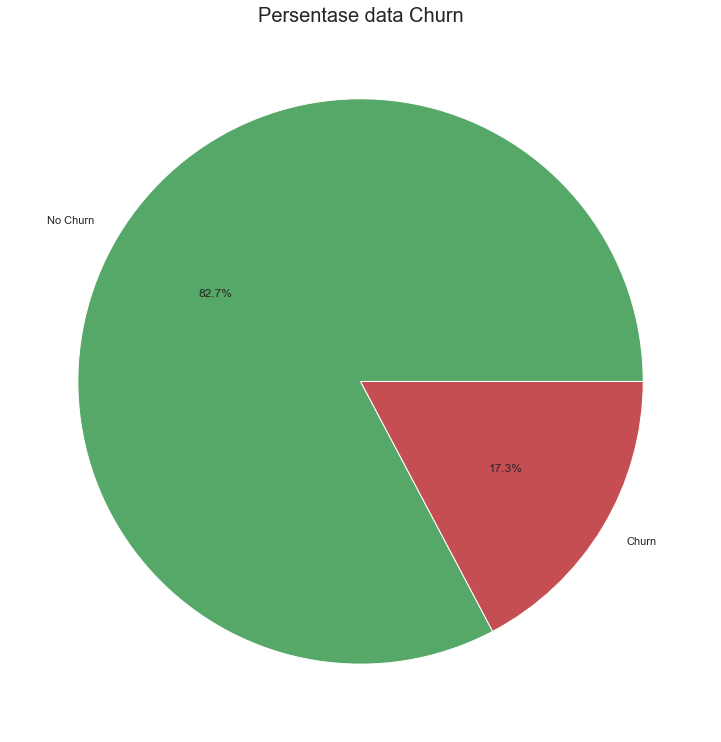

In [68]:
plt.title("Persentase data Churn", fontsize=20)
plt.pie(features['Churn'].value_counts(), labels=['No Churn', 'Churn'],
        autopct='%1.1f%%', colors=['g','r'])

Dari pie chart diatas didapatkan gambaran bahwa data sangat imbalance

### Splitting features and label

In [69]:
y = features["Churn"]
x = features.drop('Churn', axis=1)

In [70]:
x

,CashbackAmount,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,PreferredPaymentMode,PreferedOrderCat,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,159.93,4.0,3,6.0,3,2,9,1,5.0,4,2,1,0,0,0,1
1,120.90,0.0,1,8.0,4,3,7,1,0.0,6,3,0,1,0,0,1
2,120.28,0.0,1,30.0,4,3,6,1,3.0,4,3,0,1,0,0,1
3,134.07,0.0,3,15.0,4,5,8,0,3.0,4,2,0,1,0,0,1
4,129.60,0.0,1,12.0,3,5,3,0,3.0,0,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,150.71,10.0,1,30.0,2,1,6,0,4.0,3,2,0,1,0,1,0
5626,224.91,13.0,1,13.0,5,5,6,0,0.0,3,0,0,1,0,1,0
5627,186.42,1.0,1,11.0,2,4,3,1,4.0,4,2,0,1,0,1,0
5628,178.90,23.0,3,9.0,5,4,4,0,9.0,3,2,0,1,0,1,0


### Split data train and data test for validation

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Melakukan oversampling menggunakan ADASYN

In [72]:
oversample = ADASYN()
X, Y = oversample.fit_resample(x_train, y_train)

### Perbedaan sebelum melakukan oversampling dan sesudah

In [73]:
Counter(y_train)

Counter({0: 3465, 1: 715})

In [74]:
Counter(Y)

Counter({0: 3465, 1: 3468})

### Standardization

In [75]:
# Melakukan standardization pada data train
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X)
x_data_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)

In [76]:
x_data_train_scaled

,CashbackAmount,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,PreferredPaymentMode,PreferedOrderCat,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.574962,-0.394778,-0.737649,-0.245055,-0.668975,-1.542661,-0.846251,-0.667292,1.412859,0.400695,-0.293794,1.499102,-1.124698,-0.3295,-0.777728,1.477564
1,-0.579898,-0.012200,-0.737649,-0.245055,-2.755345,-0.027858,-0.445139,-0.667292,-0.497736,-0.309069,-0.293794,-0.667066,0.889127,-0.3295,1.285796,-0.676790
2,-0.780573,-0.777356,1.515765,1.859727,-1.712160,1.486945,-0.445139,-0.667292,-0.816169,-1.728598,1.168427,-0.667066,0.889127,-0.3295,-0.777728,1.477564
3,-1.106637,-0.904882,-0.737649,-1.235541,-0.668975,-0.785259,-0.044028,-0.667292,-0.497736,-2.438362,0.437316,1.499102,-1.124698,-0.3295,1.285796,-0.676790
4,3.062104,2.793375,-0.737649,-0.864109,0.374211,-1.542661,-0.044028,1.498595,-0.179304,0.400695,-1.024904,1.499102,-1.124698,-0.3295,-0.777728,1.477564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,-0.463519,-0.777356,-0.737649,0.907819,0.374211,-0.027858,-0.445139,1.498595,-0.228913,-0.309069,1.168427,-0.667066,0.889127,-0.3295,-0.777728,-0.676790
6929,0.288684,-0.829133,1.515765,2.107348,-0.668975,-1.542661,-0.846251,-0.667292,1.731292,1.110459,-1.024904,-0.667066,-1.124698,-0.3295,-0.777728,-0.676790
6930,0.412024,-0.841777,-0.737649,1.919718,0.374211,-0.027858,-0.846251,-0.667292,1.731292,-1.018834,-1.756015,-0.667066,0.889127,-0.3295,-0.777728,-0.676790
6931,0.262515,-0.857419,1.515765,2.107348,-0.668975,-1.542661,-0.846251,-0.667292,1.731292,1.110459,-1.756015,-0.667066,-1.124698,-0.3295,1.285796,-0.676790


# Modeling

![Pycaret](ecom_pycaret.jpg)

sebelumnya sudah menggunakan pycaret dan saya akan mencoba 4 model terbaik menurut pycaret yaitu
- lightgbm
- random forest
- extra trees
- decision tree

In [124]:
# OOP
class trymodel(object):
    Xtrain = x_data_train_scaled
    Ytrain = Y
    model.fit(Xtrain, Ytrain)
    def classreport(model, x, y):
        prediction_test = model.predict(x)
        print(classification_report(y, prediction_test))
    def evaluation():
        prediction_test = model.predict(x)
        confu = metrics.confusion_matrix(y, prediction_test)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
        cm_display.plot()
        
        print(f'TRAIN {model}')
        print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
        print(f'Recall Score {model} {recall_score(y, prediction_test)}')
        print(f'Precision Score {model} {precision_score(y, prediction_test)}')
        print(f'F1 Score {model} {f1_score(y, prediction_test)}')
        print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
        
        plt.show()

In [77]:
# Function untuk classification report
def clasreport(model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(Xtest)
    print(classification_report(Ytest, prediction_test))
 
# Function Evaluation train dan test untuk cek apakah model overfitting atau tidak    
def evaluation_train(model, x, y):
    
    model.fit(x,y)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TRAIN {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()
    
def evaluation_test(model,Xtrain, Ytrain, x, y):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TEST {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()

###  Lightgbm

TRAIN LGBMClassifier(random_state=1)
Accuracy Score LGBMClassifier(random_state=1) 0.9924996394057407
Recall Score LGBMClassifier(random_state=1) 0.9916378316032295
Precision Score LGBMClassifier(random_state=1) 0.9933564413633738
F1 Score LGBMClassifier(random_state=1) 0.9924963924963925
ROC-AUC Score LGBMClassifier(random_state=1) 0.9925000124827114


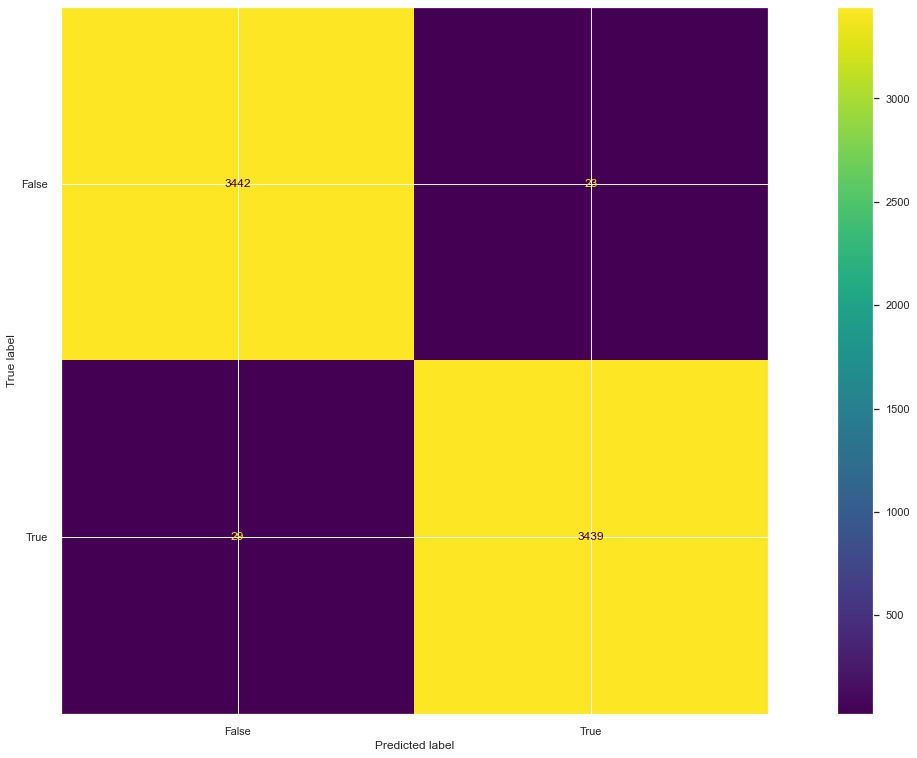

TEST LGBMClassifier(random_state=1)
Accuracy Score LGBMClassifier(random_state=1) 0.8718929254302104
Recall Score LGBMClassifier(random_state=1) 0.40106951871657753
Precision Score LGBMClassifier(random_state=1) 0.7731958762886598
F1 Score LGBMClassifier(random_state=1) 0.528169014084507
ROC-AUC Score LGBMClassifier(random_state=1) 0.6877291714653901


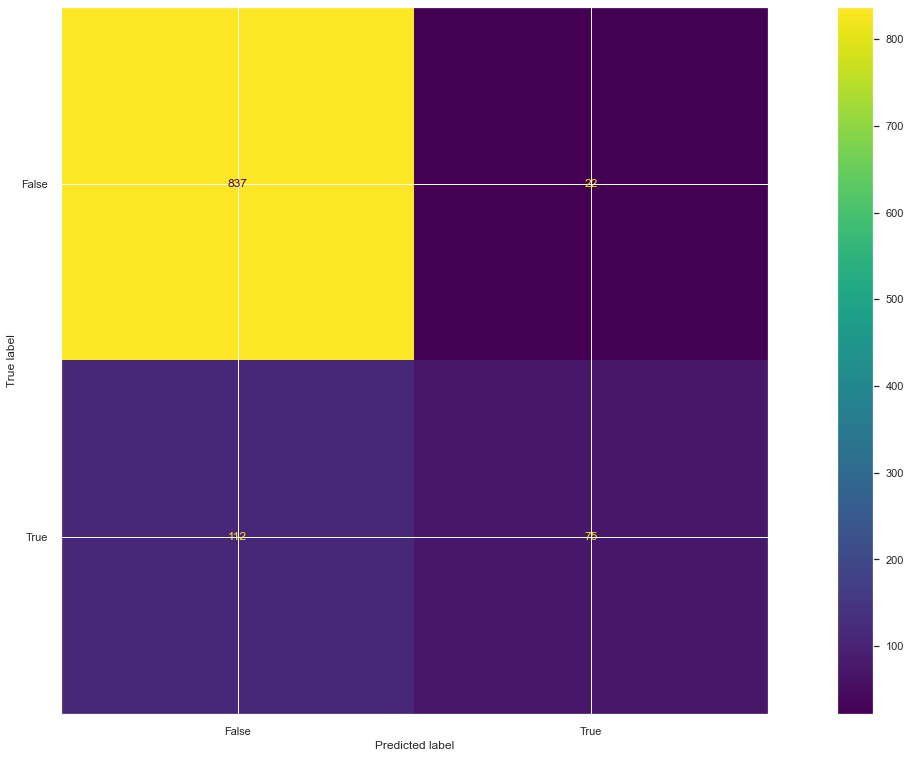

In [78]:
evaluation_train(ltb.LGBMClassifier(random_state=1), x_data_train_scaled, Y)
evaluation_test(ltb.LGBMClassifier(random_state=1),x_data_train_scaled, Y, x_test, y_test)

In [79]:
clasreport(ltb.LGBMClassifier(random_state=1), x_data_train_scaled, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       859
           1       0.77      0.40      0.53       187

    accuracy                           0.87      1046
   macro avg       0.83      0.69      0.73      1046
weighted avg       0.86      0.87      0.85      1046



Penjelasan Model ini

### Random Forest

TRAIN RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 1.0
Recall Score RandomForestClassifier(random_state=1) 1.0
Precision Score RandomForestClassifier(random_state=1) 1.0
F1 Score RandomForestClassifier(random_state=1) 1.0
ROC-AUC Score RandomForestClassifier(random_state=1) 1.0


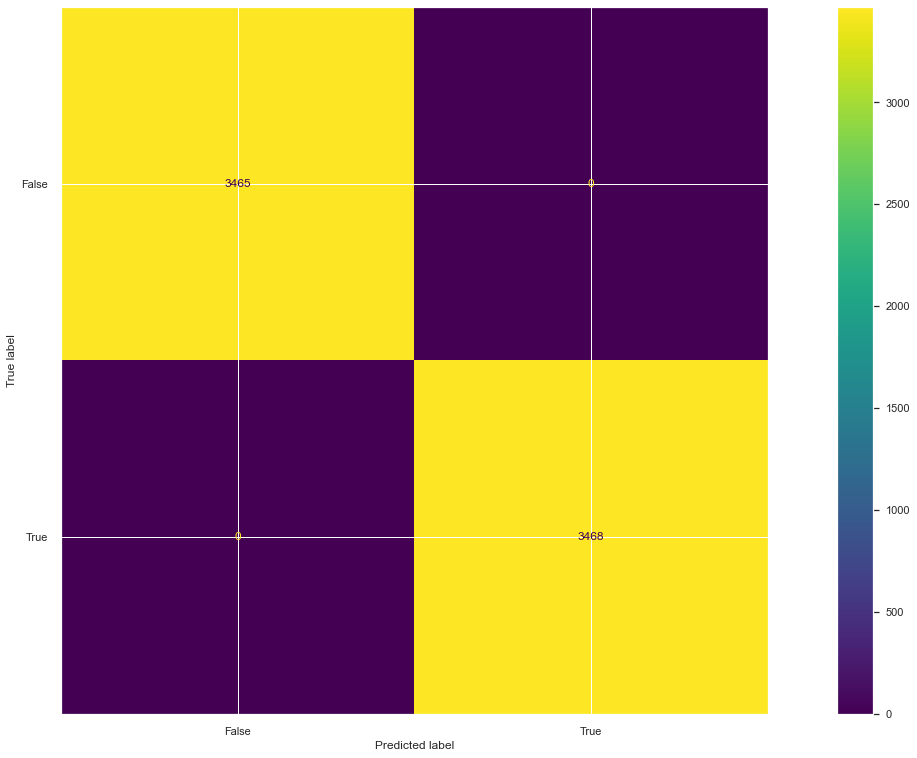

TEST RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 0.8307839388145315
Recall Score RandomForestClassifier(random_state=1) 0.1657754010695187
Precision Score RandomForestClassifier(random_state=1) 0.5961538461538461
F1 Score RandomForestClassifier(random_state=1) 0.2594142259414226
ROC-AUC Score RandomForestClassifier(random_state=1) 0.5706641848188105


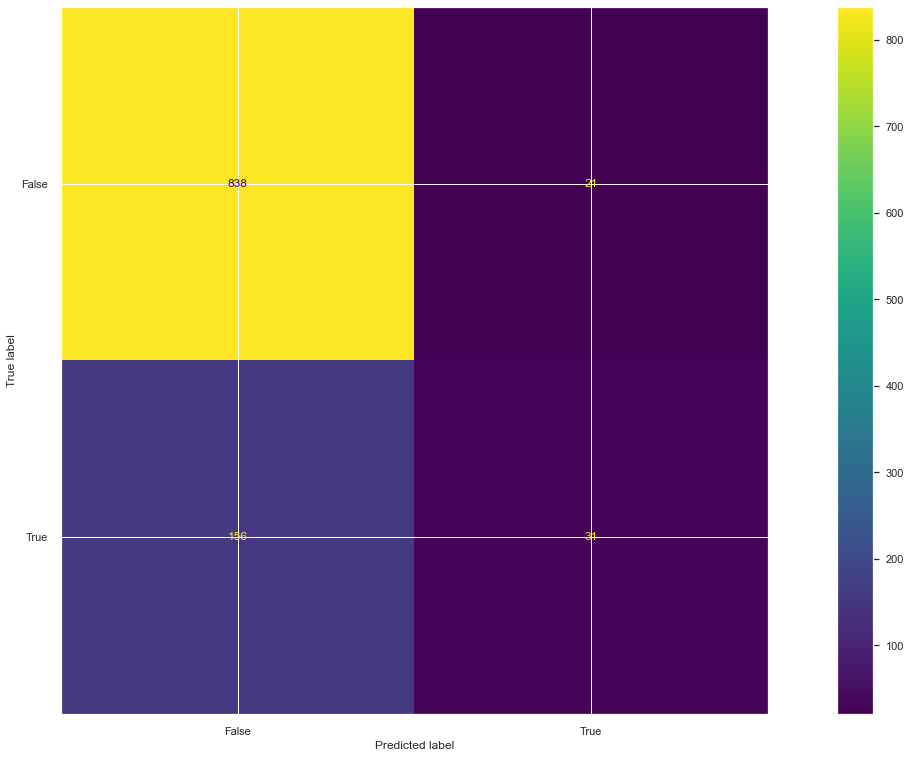

In [80]:
evaluation_train(RandomForestClassifier(random_state=1), x_data_train_scaled, Y)
evaluation_test(RandomForestClassifier(random_state=1),x_data_train_scaled, Y, x_test, y_test)

In [81]:
clasreport(RandomForestClassifier(random_state=1), x_data_train_scaled, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       859
           1       0.60      0.17      0.26       187

    accuracy                           0.83      1046
   macro avg       0.72      0.57      0.58      1046
weighted avg       0.80      0.83      0.79      1046



Kesimpulan model ini Overfit

### Extra Trees

TRAIN ExtraTreesClassifier(random_state=1)
Accuracy Score ExtraTreesClassifier(random_state=1) 1.0
Recall Score ExtraTreesClassifier(random_state=1) 1.0
Precision Score ExtraTreesClassifier(random_state=1) 1.0
F1 Score ExtraTreesClassifier(random_state=1) 1.0
ROC-AUC Score ExtraTreesClassifier(random_state=1) 1.0


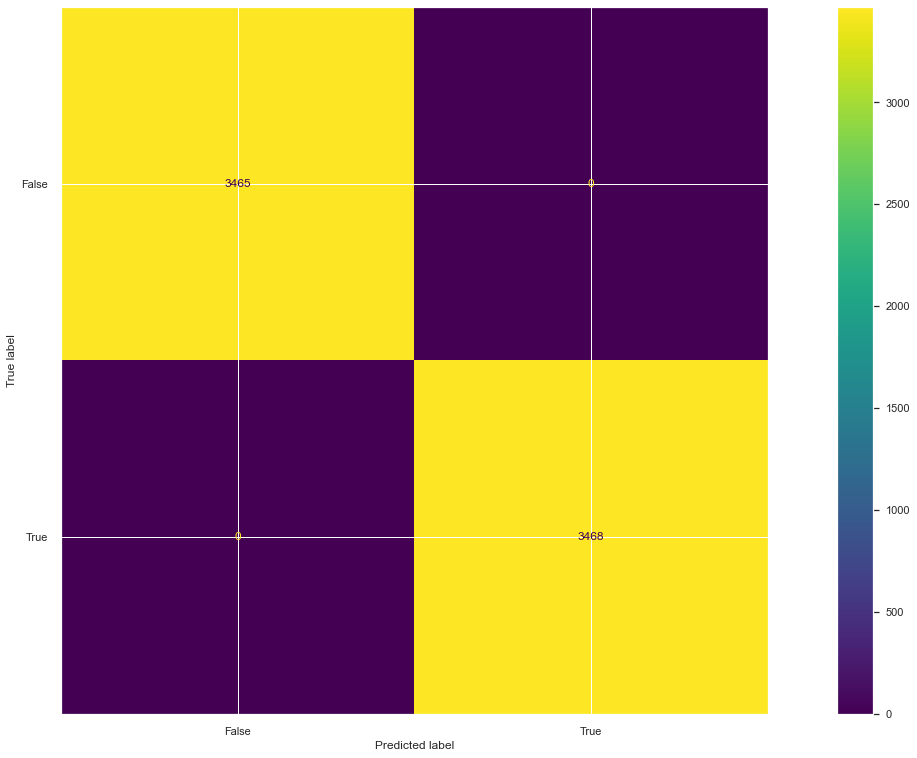

TEST ExtraTreesClassifier(random_state=1)
Accuracy Score ExtraTreesClassifier(random_state=1) 0.8212237093690249
Recall Score ExtraTreesClassifier(random_state=1) 0.0
Precision Score ExtraTreesClassifier(random_state=1) 0.0
F1 Score ExtraTreesClassifier(random_state=1) 0.0
ROC-AUC Score ExtraTreesClassifier(random_state=1) 0.5


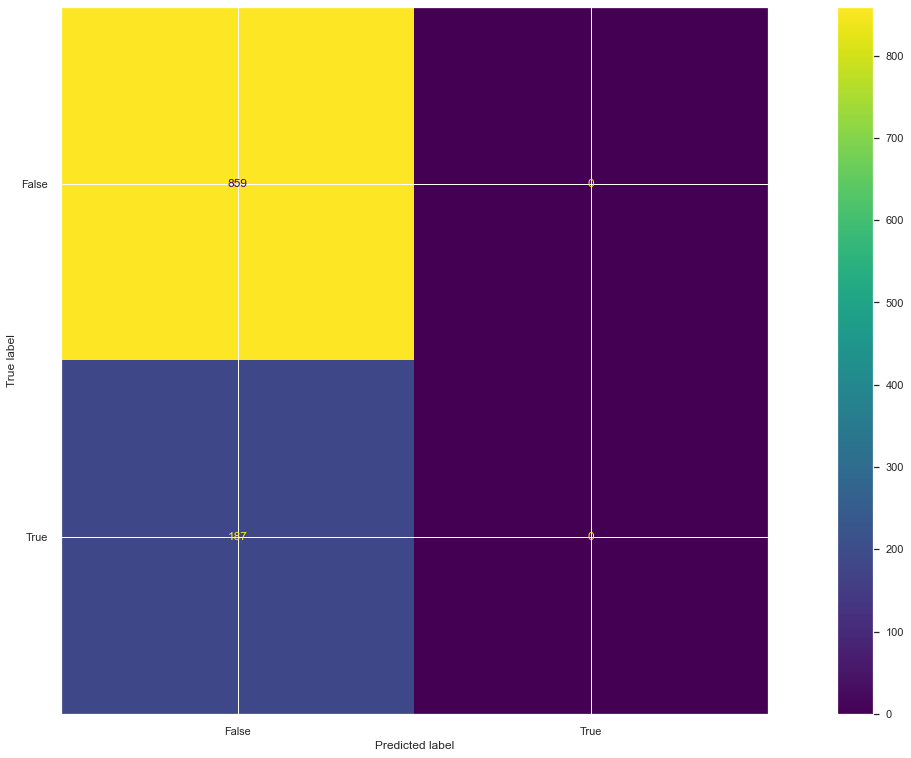

In [82]:
evaluation_train(ExtraTreesClassifier(random_state=1), x_data_train_scaled, Y)
evaluation_test(ExtraTreesClassifier(random_state=1),x_data_train_scaled, Y, x_test, y_test)

In [83]:
clasreport(ExtraTreesClassifier(), x_data_train_scaled, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       859
           1       0.00      0.00      0.00       187

    accuracy                           0.82      1046
   macro avg       0.41      0.50      0.45      1046
weighted avg       0.67      0.82      0.74      1046



Model ini Overfit

### Decision Treee

TRAIN DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 1.0
Recall Score DecisionTreeClassifier(random_state=1) 1.0
Precision Score DecisionTreeClassifier(random_state=1) 1.0
F1 Score DecisionTreeClassifier(random_state=1) 1.0
ROC-AUC Score DecisionTreeClassifier(random_state=1) 1.0


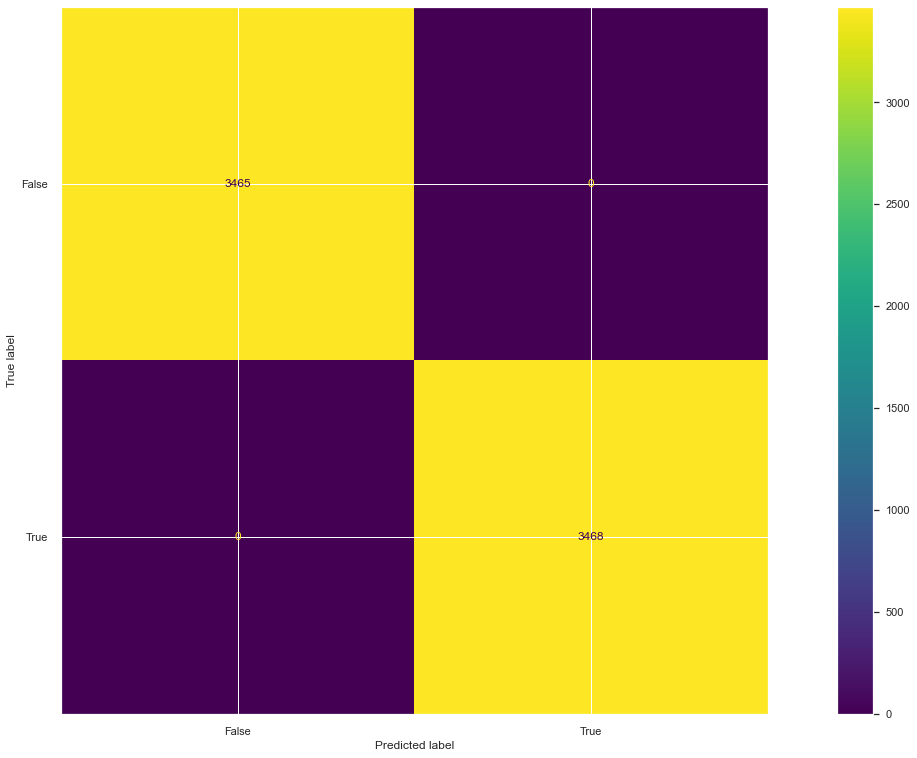

TEST DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 0.6950286806883366
Recall Score DecisionTreeClassifier(random_state=1) 0.44385026737967914
Precision Score DecisionTreeClassifier(random_state=1) 0.2785234899328859
F1 Score DecisionTreeClassifier(random_state=1) 0.3422680412371134
ROC-AUC Score DecisionTreeClassifier(random_state=1) 0.5967796156456021


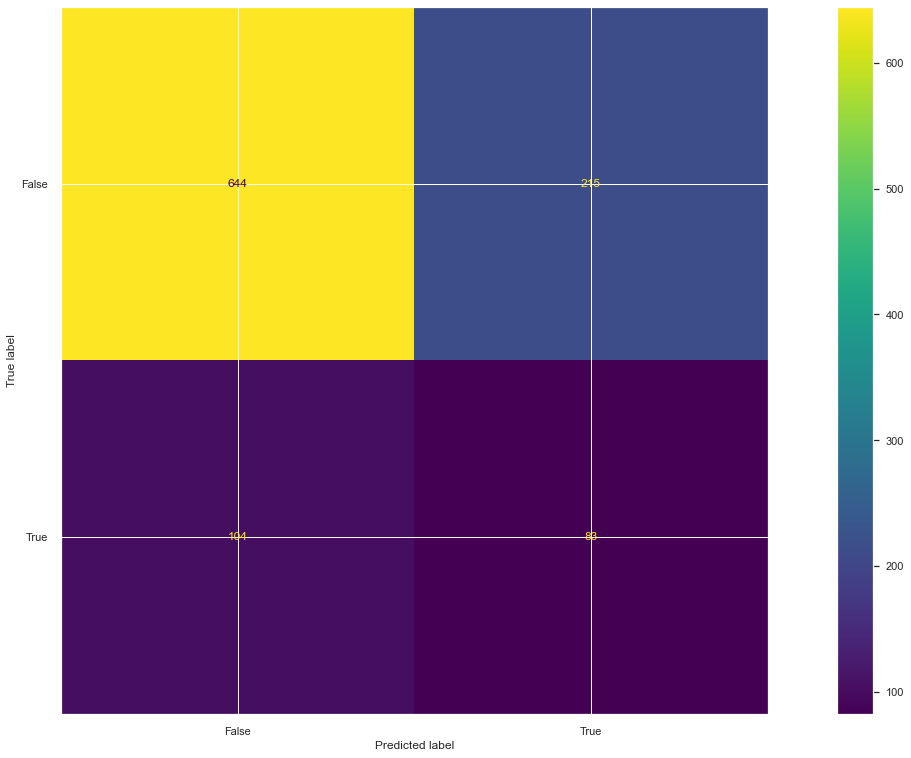

In [84]:
evaluation_train(DecisionTreeClassifier(random_state=1), x_data_train_scaled, Y)
evaluation_test(DecisionTreeClassifier(random_state=1),x_data_train_scaled, Y, x_test, y_test)

In [85]:
clasreport(DecisionTreeClassifier(), x_data_train_scaled, Y, x_test, y_test)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       859
           1       0.24      0.33      0.28       187

    accuracy                           0.69      1046
   macro avg       0.54      0.55      0.54      1046
weighted avg       0.73      0.69      0.71      1046



Model ini Overfit

Conclusions
So what are these metrics good for?

The traditional Accuracy is a good measure if you have quite balanced datasets and are interested in all types of outputs equally. I like to start with it in any case, as it is intuitive, and dig deeper from there as needed.

Precision is great to focus on if you want to minimize false positives. For example, you build a spam email classifier. You want to see as little spam as possible. But you do not want to miss any important, non-spam emails. In such cases, you may wish to aim for maximizing precision.

Recall is very important in domains such as medical (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.

Neither precision nor recall is necessarily useful alone, since we rather generally are interested in the overall picture. Accuracy is always good to check as one option. F1-score is another.

F1-score combines precision and recall, and works also for cases where the datasets are imbalanced as it requires both precision and recall to have a reasonable value, as demonstrated by the experiments I showed in this post. Even if you have a small number of positive cases vs negative cases, the formula will weight the metric value down if the precision or recall of the positive class is low.

Besides these, there are various other metrics and ways to explore your results. A popular and very useful approach is also use of ROC- and precision-recall curves. These allow fine-tuning the evaluation thresholds according to what type of error we want to minimize. But that is a different topic to explore.

### Karena yang dicari adalah score akurasi dan model yang tidak begitu overfitting adalah lightgbm sehingga model ini yang akan saya pakau

In [86]:
#Visuali

train_scores, test_scores = list(), list()
values = [i for i in range(1,11)]

for i in values:
    model = ltb.LGBMClassifier(max_depth=i)
    
    model.fit(x_data_train_scaled, Y)
    
    train_yhat = model.predict(x_data_train_scaled)
    train_acc = accuracy_score(Y, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat  =model.predict(x_test)
    test_acc = accuracy_score(y_test,test_yhat)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.843, test: 0.821
>2, train: 0.884, test: 0.858
>3, train: 0.915, test: 0.879
>4, train: 0.947, test: 0.878
>5, train: 0.972, test: 0.864
>6, train: 0.986, test: 0.869
>7, train: 0.989, test: 0.878
>8, train: 0.990, test: 0.871
>9, train: 0.992, test: 0.870
>10, train: 0.993, test: 0.869


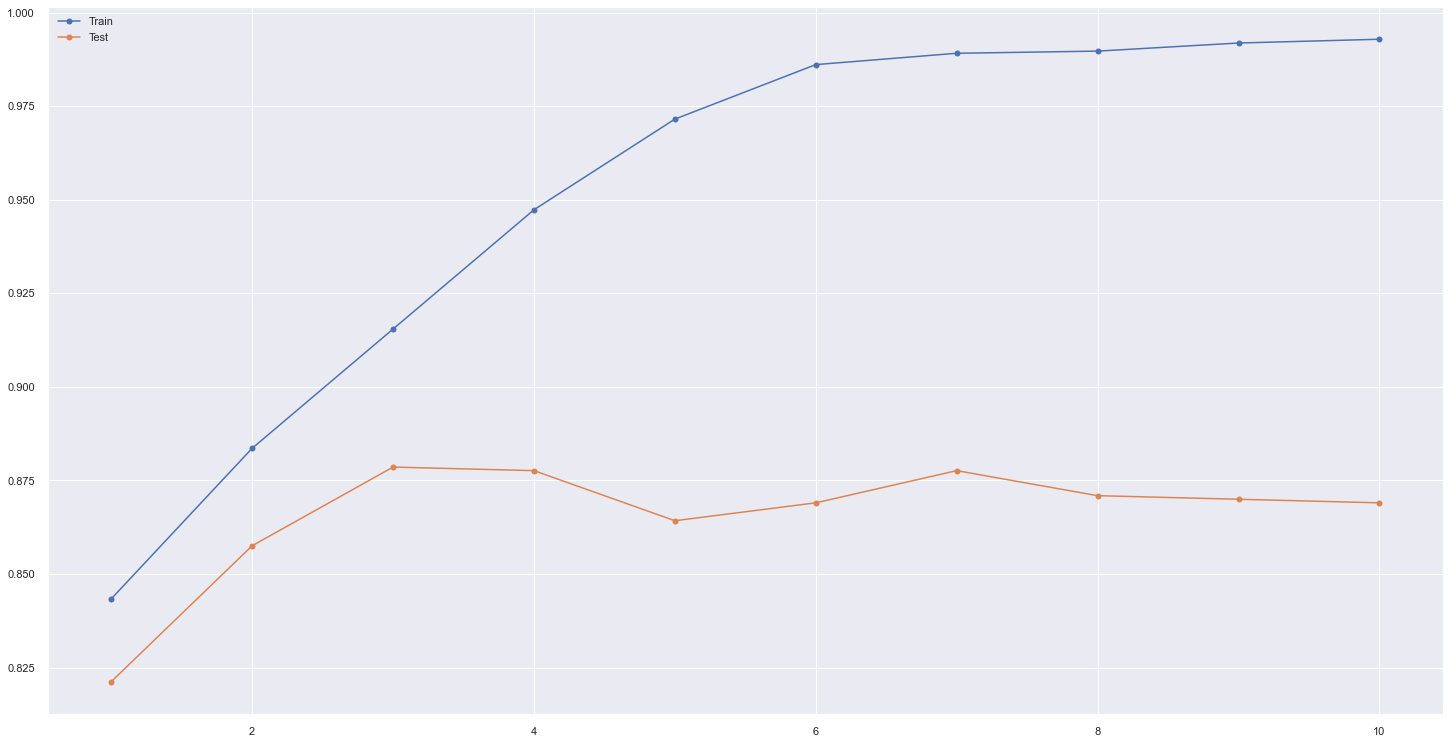

In [87]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Model ini bisa dikatakn overfitting (tetapi tidak lebih parah daripada model yang lain) karena kurva dari validasi testing tidak mengikuti kenaikan seperti evaluasi pada data train

# Hyperparameter Tuning - Lightgbm 

In [88]:
boosting_type = ['gbdt', 'dart', 'goss', 'rf']
max_depth = [i for i in range(1,11)]
learning_rate = [0.1, 0.5, 0.01, 0.05, 0.001]
n_estimators = [100, 300, 500, 800, 1200]

hyperF = dict(boosting_type = boosting_type, n_estimators = n_estimators, max_depth = max_depth,
              learning_rate =learning_rate)

gridF = RandomizedSearchCV(ltb.LGBMClassifier(random_state=1), hyperF, cv=3, verbose=1,
                           n_jobs=1)
bestF = gridF.fit(x_data_train_scaled, Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [89]:
gridF.best_estimator_

LGBMClassifier(boosting_type='dart', max_depth=6, n_estimators=1200,
               random_state=1)

TRAIN LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1)
Accuracy Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.9831241886629165
Recall Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.9858708189158016
Precision Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.980498996271867
F1 Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.983177570093458
ROC-AUC Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.983122999645491


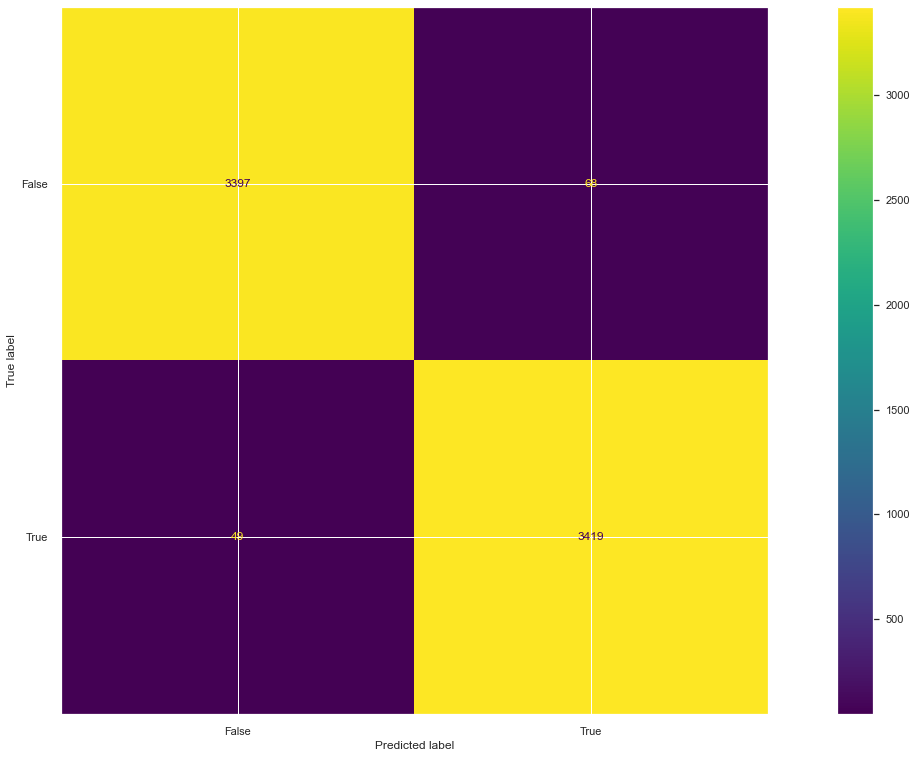

In [90]:
evaluation_train(ltb.LGBMClassifier(boosting_type = 'goss', n_estimators = 300, max_depth = 5,
              learning_rate =0.05, random_state=1), x_data_train_scaled, Y)

TEST LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1)
Accuracy Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.8804971319311663
Recall Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.48128342245989303
Precision Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.7627118644067796
F1 Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.5901639344262295
ROC-AUC Score LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               n_estimators=300, random_state=1) 0.7243436902753481


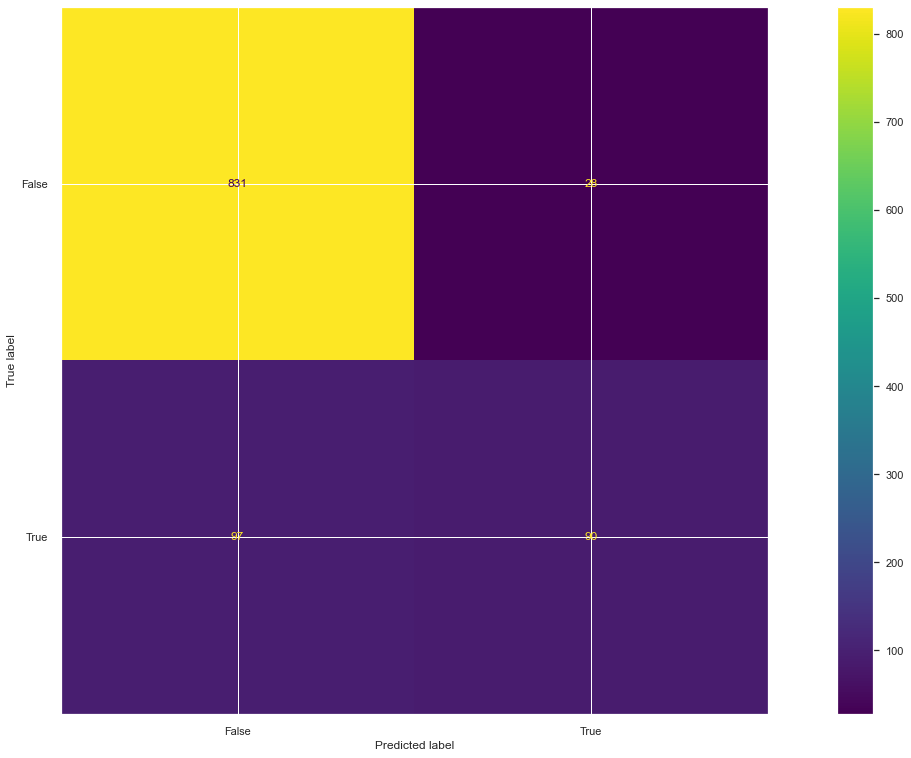

In [91]:
evaluation_test(ltb.LGBMClassifier(boosting_type = 'goss', n_estimators = 300, max_depth = 5,
              learning_rate =0.05, random_state=1), x_data_train_scaled, Y, x_test, y_test)

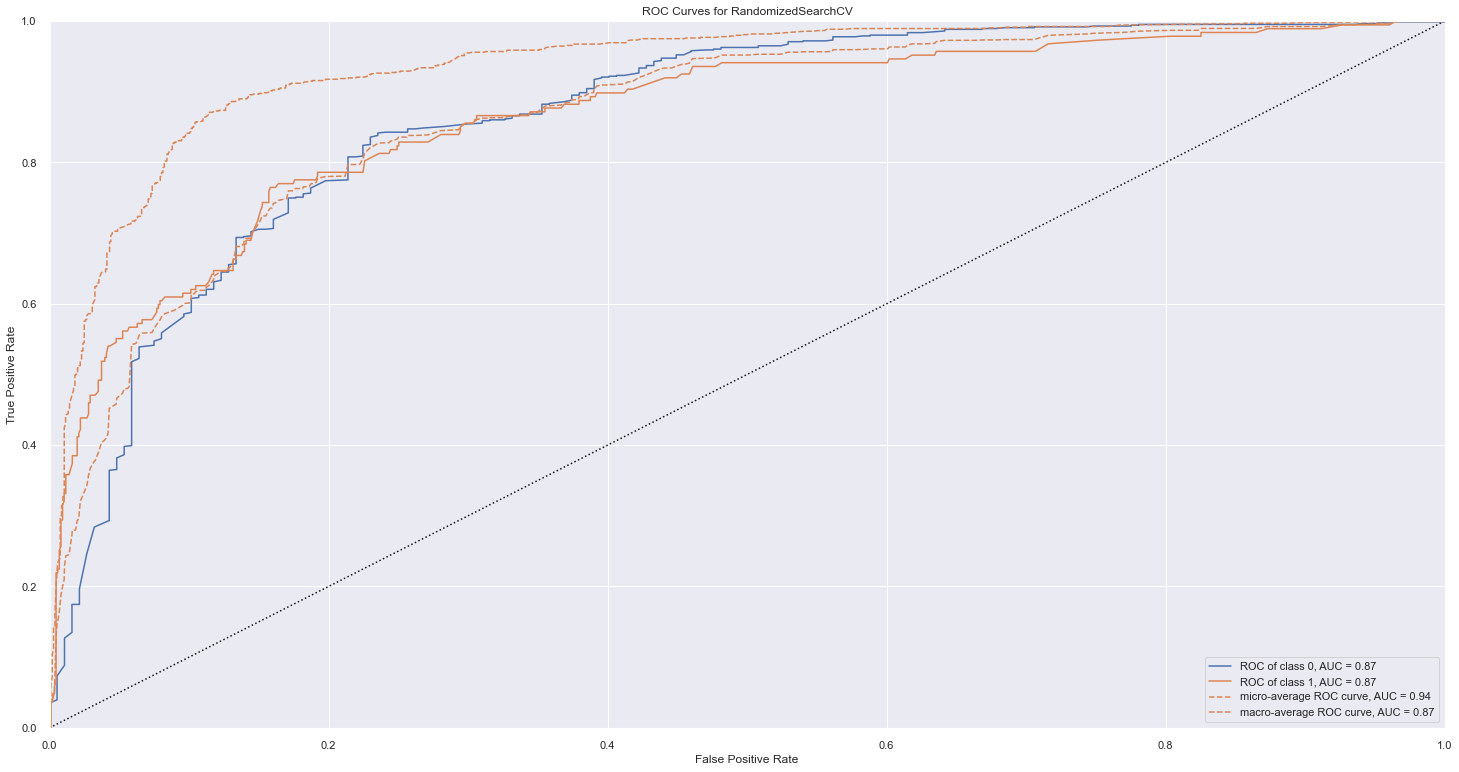

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [92]:
visualizer = ROCAUC(gridF, classes=gridF.classes_)

visualizer.fit(x_data_train_scaled, Y)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Pada saat validasi menggunakan kurva ROCAUC didapatkan bahwa model menunjukkan akurasi yang bagus dan bisa digunakan karena didapatkan jauh diatas random choice (garis patah" berwarna hitam) referensi keputusan mengenai kurva ROCAUC pada link berikut link: https://www.youtube.com/watch?v=OV0ros6SnNo

![Pycaret](rocaucref.jpg)

# Model explain / Check Feature Important

In [93]:
lgbm_cv_intrepreted = dx.Explainer(gridF.best_estimator_, x_data_train_scaled, Y, label = "Light GBM")

Preparation of a new explainer is initiated

  -> data              : 6933 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6933 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Light GBM
  -> predict function  : <function yhat_proba_default at 0x000002BCF3620550> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.87e-07, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.275, mean = -1.78e-06, max = 0.202
  -> model_info        : package lightgbm

A new explainer has been created!


In [94]:
lgbm_cv_intrepreted.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 16/16 [00:19<00:00,  1.22s/it]


### Insight model explain
- Cahsbavk amount tidak begitu mempengaruhi model sehingga tidak ada tren yang didapatkan
- Tenure memiliki tren turun sehinggasemakin tinggi nilai Tenure makan probabilitas atau kemungkinan customer tersebut berlabel 0 (non-churn) semakin tinggi
- Number of address memiliki tren naik sehingga semakin banyak alamat yang dimasukkan pada data akan semakin besar kemungkinan untuk customer tersebut berlabel 1(Churn)
- Warehouse to home tidak bisa dikatakan tren naik atau turun karena selisih dalam probabilitasnya sangat kecil 

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

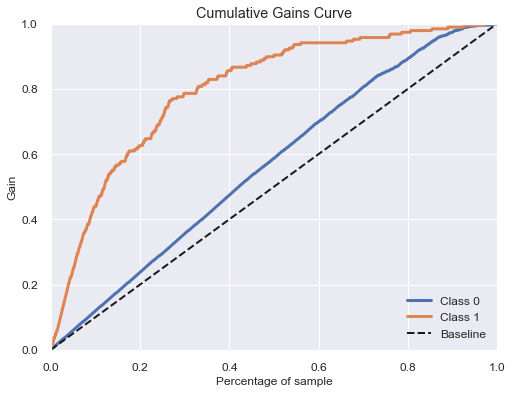

In [95]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,gridF.predict_proba(x_test),
                                   title='Cumulative Gains Curve', 
                                   ax=None, figsize=(8,6), 
                                   title_fontsize='large', 
                                   text_fontsize='medium')


Jika kita mengagaap bahwa titik gain 0.8 sudah cukup bagus maka presentase sample yang bisa kita gunakan sekitar 30 %

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

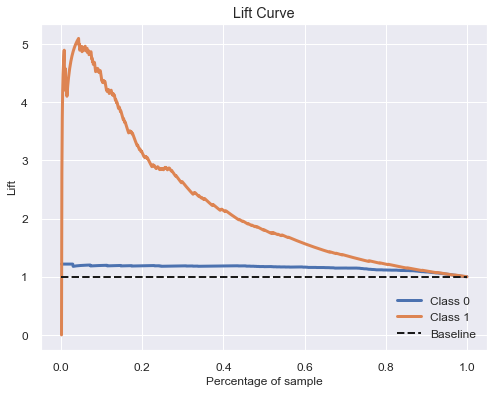

In [96]:
skplt.metrics.plot_lift_curve(y_test,gridF.predict_proba(x_test),
                              title='Lift Curve',
                              ax=None, 
                              figsize=(8,6), 
                              title_fontsize='large', 
                              text_fontsize='medium')

jika menggunakan presentase semple 30% maka model ini 2 (kurang lebih) kali lipat lebih bagus daripada random choice, begitupun juga presentase lain (mengkitu kurva diatas)

# Insight

- Didapatkan dari beberapa percobaan model, banyak model yang ternyata overfitting. dan model yang jarak antara train dan testnya tidak terlalu jauh ialah LGBM sehingga model tersebut digunakan pada kali ini
- Karena yang ingin diselesaikan adalah masalah bisnis perihal churn pada customer, sehingga lebih baik yang digunakan adalah False Positive (FP) karena lebih baik mengingkatkan penawaran bisnis terhapad customer yang False Positive dengan memberi program-program menarikk karena diindikasikan customer tersebut Churn (meskipun hasil actual tidak churn)
- Model tersebut menurut saya bisa digunakan karena akurasi yang cukup baik, dan interprate model (model explain) masuk akal dengan EDA

# Exporting model to pickle file

In [100]:
filename = 'Churn_lgbm.pkl'
pickle.dump(gridF, open(filename, 'wb'))

# Exporting test data (i will test data using pickle file in trypickle.ipynb)

In [114]:
x_train

,CashbackAmount,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,PreferredPaymentMode,PreferedOrderCat,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1420,144.24,4.0,1,14.0,3,1,2,0,8.0,4,2,1,0,0,0,1
1344,144.04,7.0,1,14.0,1,3,3,0,2.0,3,2,0,1,0,1,0
4055,135.91,1.0,3,31.0,2,5,3,0,1.0,1,4,0,1,0,0,1
588,122.70,0.0,1,6.0,3,2,4,0,2.0,0,3,1,0,0,1,0
4539,291.59,29.0,1,9.0,4,1,4,1,3.0,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,170.83,7.0,3,6.0,4,3,2,1,6.0,1,0,0,1,1,0,0
5593,174.07,1.0,3,15.0,4,3,2,1,5.0,6,2,1,0,0,1,0
4258,263.72,31.0,3,17.0,4,3,2,0,9.0,3,1,0,1,0,0,1
251,149.36,24.0,3,20.0,3,2,5,0,7.0,4,2,1,0,1,0,0


In [115]:
x_train.to_csv('train_data.csv')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------